In [111]:
import os
import argparse
import warnings
warnings.simplefilter(action='ignore', category=DeprecationWarning) # pandas warning pyarrow
import pandas as pd
import numpy as np
from scipy.stats import wasserstein_distance, spearmanr, multinomial, ttest_1samp
from analysis.utils import mdl2dist, calc_error_rate, conf_bin, log_lik_ratio, mulinomial_var
import matplotlib.pyplot as plt
import matplotlib as mpl
from cycler import cycler
mpl.rcParams['lines.linewidth'] = 16
mpl.rcParams['axes.prop_cycle'] = cycler(color=["#1b9e77", "#d95f02", "#7570b3", "#e7298a", "#66a61e", "#e6ab02", "#a6761d", "#666666"])
#plt.rcParams.update({'font.size': 16})
from sklearn import linear_model

In [8]:
# OLD Directories
proj_dir = "/home/wcp27/project/halluc_prog_MAPnet"

# Models
exp_high = ["A1_CL050_00", "A1_BL080_00", "A1_NO450_00", "A1_CO080_00", "A1_CE080_00", "A1_ED080_00", "A1_CX080_00", "A1_MI080_00"]
exp_low = ["A1_CL050_00", "A1_BL040_00", "A1_NO250_00", "A1_CO040_00", "A1_CE040_00", "A1_ED040_00", "A1_CX040_00", "A1_MI040_00"]
exp_lowest = ["A1_CL050_00", "A1_BL020_00", "A1_NO150_00", "A1_CO020_00", "A1_CE020_00", "A1_ED020_00", "A1_CX020_00", "A1_MI020_00"]
exp_prog = ["A1_CL050_00", "A1_BL021_00", "A1_NO151_00", "A1_CO021_00", "A1_CE021_00", "A1_ED021_00", "A1_CX021_00", "A1_MI021_00"]
noe_high = ["A0_CL050_00", "A0_BL080_00", "A0_NO450_00", "A0_CO080_00", "A0_CE080_00", "A0_ED080_00", "A0_CX080_00", "A0_MI080_00"]
noe_low = ["A0_CL050_00", "A0_BL040_00", "A0_NO450_00", "A0_CO040_00", "A0_CE040_00", "A0_ED040_00", "A0_CX040_00", "A0_MI040_00"]
noe_lowest = ["A0_CL050_00", "A0_BL020_00", "A0_NO150_00", "A0_CO020_00", "A0_CE020_00", "A0_ED020_00", "A0_CX020_00", "A0_MI020_00"]
noe_prog = ["A0_CL050_00", "A0_BL021_00", "A0_NO151_00", "A0_CO021_00", "A0_CE021_00", "A0_ED021_00", "A0_CX021_00", "A0_MI021_00"]
store_models = [exp_high, exp_low, exp_lowest, exp_prog, noe_high, noe_low, noe_lowest, noe_prog]

# Count
count = 4
mod = range(count+1)

In [112]:
# Directories
proj_dir = "/home/wcp27/project/halluc_prog_MAPnet"

# Models
exp_high = ["A1_CL00050_00", "A1_BL02600_00", "A1_NO00200_00", "A1_CO70000_00", "A1_CE62000_00", "A1_ED12000_00", "A1_CX02700_00", "A1_MI14000_00"]
exp_mid = ["A1_CL00050_00", "A1_BL01500_00", "A1_NO00110_00", "A1_CO18000_00", "A1_CE04000_00", "A1_ED04000_00", "A1_CX01800_00", "A1_MI04000_00"]
exp_low = ["A1_CL00050_00", "A1_BL00200_00", "A1_NO00060_00", "A1_CO04000_00", "A1_CE01500_00", "A1_ED01500_00", "A1_CX01400_00", "A1_MI01500_00"]
#exp_prog = ["A1_CL050_00", "A1_BL021_00", "A1_NO151_00", "A1_CO021_00", "A1_CE021_00", "A1_ED021_00", "A1_CX021_00", "A1_MI021_00"]
noe_high = ["A0_CL00050_00", "A0_BL02600_00", "A0_NO00200_00", "A0_CO70000_00", "A0_CE62000_00", "A0_ED12000_00", "A0_CX02700_00", "A0_MI14000_00"]
noe_mid = ["A0_CL00050_00", "A0_BL01500_00", "A0_NO00110_00", "A0_CO18000_00", "A0_CE04000_00", "A0_ED04000_00", "A0_CX01800_00", "A0_MI04000_00"]
noe_low = ["A0_CL00050_00", "A0_BL00200_00", "A0_NO00060_00", "A0_CO04000_00", "A0_CE01500_00", "A0_ED01500_00", "A0_CX01400_00", "A0_MI01500_00"]
#noe_prog = ["A0_CL050_00", "A0_BL021_00", "A0_NO151_00", "A0_CO021_00", "A0_CE021_00", "A0_ED021_00", "A0_CX021_00", "A0_MI021_00"]
store_models = [exp_high, exp_mid, exp_low, noe_high, noe_mid, noe_low]

# Count
count = 4
mod = range(count+1)

['A1_CL00050_00', 'A1_BL02600_00', 'A1_NO00200_00', 'A1_CO70000_00', 'A1_CE62000_00', 'A1_ED12000_00', 'A1_CX02700_00', 'A1_MI14000_00']


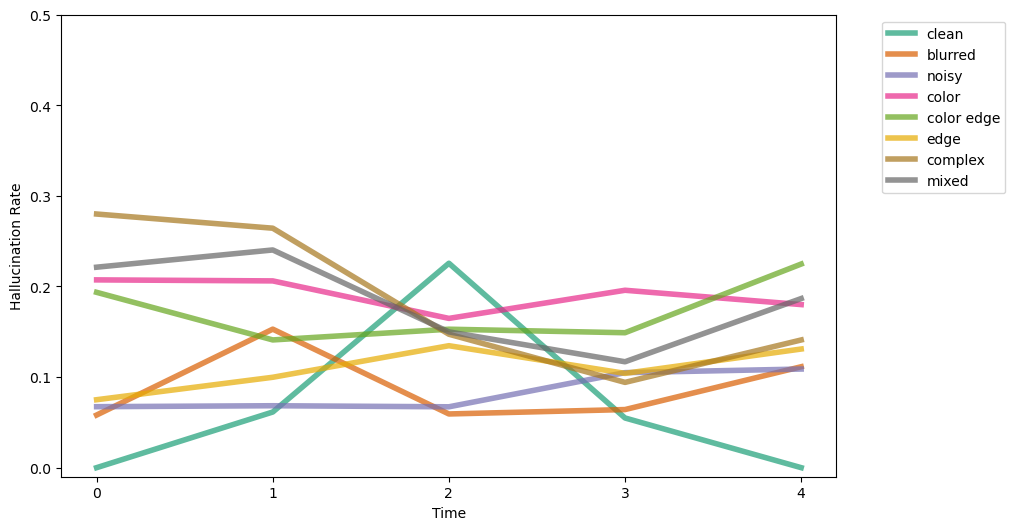

['A1_CL00050_00', 'A1_BL01500_00', 'A1_NO00110_00', 'A1_CO18000_00', 'A1_CE04000_00', 'A1_ED04000_00', 'A1_CX01800_00', 'A1_MI04000_00']


/tmp/ipykernel_2488201/2339973029.py:67: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  time_corr.append(spearmanr(mod, spec_halluc_rate).statistic)


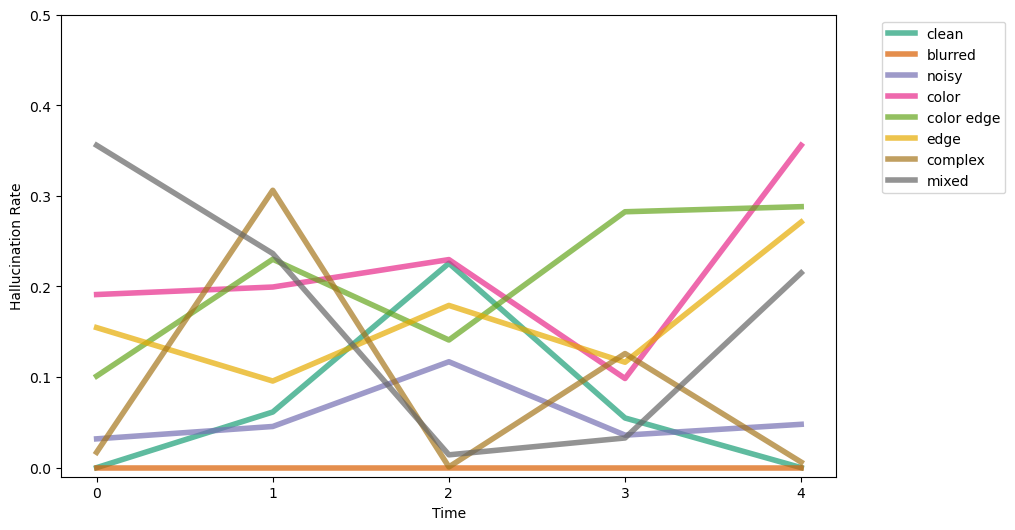

['A1_CL00050_00', 'A1_BL00200_00', 'A1_NO00060_00', 'A1_CO04000_00', 'A1_CE01500_00', 'A1_ED01500_00', 'A1_CX01400_00', 'A1_MI01500_00']


/tmp/ipykernel_2488201/2339973029.py:67: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  time_corr.append(spearmanr(mod, spec_halluc_rate).statistic)


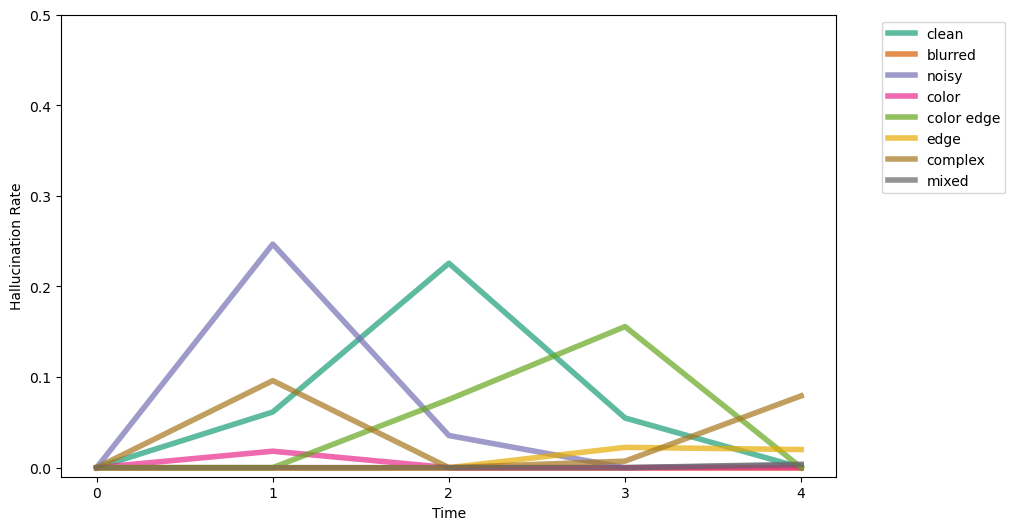

['A0_CL00050_00', 'A0_BL02600_00', 'A0_NO00200_00', 'A0_CO70000_00', 'A0_CE62000_00', 'A0_ED12000_00', 'A0_CX02700_00', 'A0_MI14000_00']


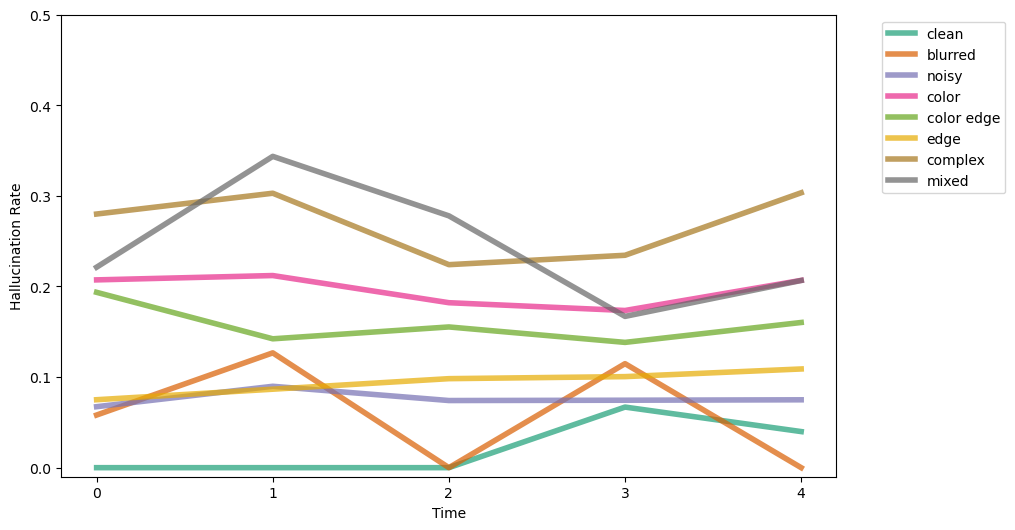

['A0_CL00050_00', 'A0_BL01500_00', 'A0_NO00110_00', 'A0_CO18000_00', 'A0_CE04000_00', 'A0_ED04000_00', 'A0_CX01800_00', 'A0_MI04000_00']


/tmp/ipykernel_2488201/2339973029.py:67: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  time_corr.append(spearmanr(mod, spec_halluc_rate).statistic)


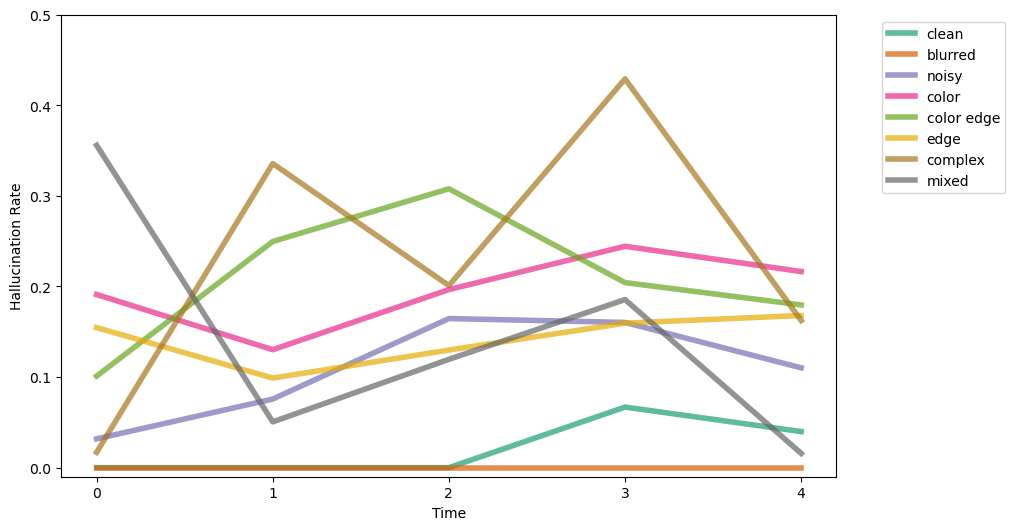

['A0_CL00050_00', 'A0_BL00200_00', 'A0_NO00060_00', 'A0_CO04000_00', 'A0_CE01500_00', 'A0_ED01500_00', 'A0_CX01400_00', 'A0_MI01500_00']


/tmp/ipykernel_2488201/2339973029.py:67: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  time_corr.append(spearmanr(mod, spec_halluc_rate).statistic)


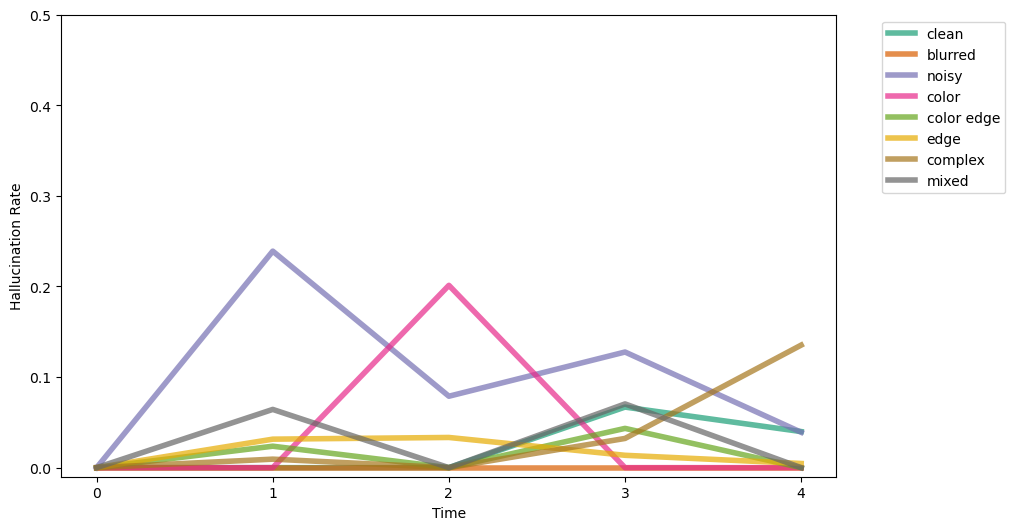

In [3]:
for m_lst in store_models:
    print(m_lst)
    fig, ax = plt.subplots(figsize=(10, 6))
    time_corr = []
    for m in m_lst:
        models = ["_".join([m, str(i)]) for i in range(0, count+1)]

        df_scene = pd.DataFrame()
        df_agent = pd.DataFrame()
        halluc_rate = []
        spec_halluc_rate = []
        spec_rate = []
        conf_dist = []
        for i, model in enumerate(models):
            # Test type
            test_type = mdl2dist(model)
            
            # Set data directory
            data_dir = "/".join([proj_dir, "images", "A", model])
        
            # Import csv
            tmp_scene = pd.read_csv("/".join([data_dir, "_".join([model, test_type,"scene_error.csv"])]))
            tmp_agent = pd.read_csv("/".join([data_dir, "_".join([model, test_type,"agent_error.csv"])]))
            tmp_pred = pd.read_csv("/".join([data_dir, "_".join([model, test_type, "pred.csv"])]))
        
            # Extract error types
            if i == 0:
                df_scene["Error"] = tmp_scene["Error"]
                df_agent["Error"] = tmp_agent["Error"]
        
            # Store values
            df_scene[model] = tmp_scene["Count"]
            df_agent[model] = tmp_agent["Count"]
            halluc_rate.append(float(open("/".join([data_dir, "_".join([model, test_type, "halluc_rate.txt"])])).readline()))

            # Alternative hallucination rate and specificity
            df_halluc = tmp_agent.iloc[0:9, :]
            if any(df_halluc["Count"] > 0):
                spec_rate.append(df_halluc["Count"].max()/sum(df_halluc["Count"].values))
                tmp_spec_halluc = []
                tmp_conf_dist = []
                for j in df_halluc[df_halluc["Count"]>0]["Error"]:
                    # Spec halluc rate
                    halluc_agent = j.split(".")[1]
                    # print(halluc_agent)
                    tmp_spec_halluc.append(df_halluc[df_halluc["Error"]==j]["Count"].values/sum(tmp_agent[tmp_agent["Error"].str.contains("."+halluc_agent)]["Count"].values))

                    # Confidence
                    #fig, ax = plt.subplots(figsize=(8, 5))
                    tmp_halluc_conf = tmp_pred[(tmp_pred["Agent"] == "none") & (tmp_pred["PredAgent"] == halluc_agent)]["ConfAgent"].values
                    tmp_err_conf = tmp_pred[(tmp_pred["Agent"] != halluc_agent) & (tmp_pred["PredAgent"] == halluc_agent)]["ConfAgent"].values
                    tmp_acc_conf = tmp_pred[(tmp_pred["Agent"] == halluc_agent) & (tmp_pred["PredAgent"] == halluc_agent)]["ConfAgent"].values
                    if len(tmp_acc_conf) == 0:
                        tmp_conf_dist.append(np.nan)
                    else:
                        tmp_conf_dist.append(wasserstein_distance(tmp_acc_conf, tmp_halluc_conf))
                    #print(len(tmp_halluc_conf), len(tmp_err_conf), len(tmp_acc_conf))
                    #print(wasserstein_distance(tmp_acc_conf, tmp_halluc_conf), wasserstein_distance(tmp_acc_conf, tmp_err_conf))
                spec_halluc_rate.append(np.array(tmp_spec_halluc).flatten().mean())
                conf_dist.append(1/(np.nanmean(np.array(tmp_conf_dist))+1))
            else:
                spec_rate.append(np.nan)
                spec_halluc_rate.append(0)
                conf_dist.append(np.nan)

        #time_corr.append(np.corrcoef(mod, spec_halluc_rate)[0,1])
        time_corr.append(spearmanr(mod, spec_halluc_rate).statistic)
        ## Hallucination Rate
        ax.plot(spec_halluc_rate, alpha=0.7, linewidth=4) 
        ax.set_xticks([i for i in range(count+1)])
        ax.set_xticklabels(mod)
        ax.set_xlabel("Time")
        ax.set_ylabel("Hallucination Rate")
    plt.ylim(-0.01, 0.50)
    plt.legend(["clean", "blurred", "noisy", "color", "color edge", "edge", "complex", "mixed"], bbox_to_anchor=(1.05, 1.0), loc='upper left')
    plt.show()

['A1_CL00050_00', 'A1_BL02600_00', 'A1_NO00200_00', 'A1_CO70000_00', 'A1_CE62000_00', 'A1_ED12000_00', 'A1_CX02700_00', 'A1_MI14000_00']
[-0.0006594737421556706, 0.001785970096431351, 0.011963994738868878, -0.00648532513498393, 0.007040386093239926, 0.011623997976209163, -0.04482487762624473, -0.019267589773073013]


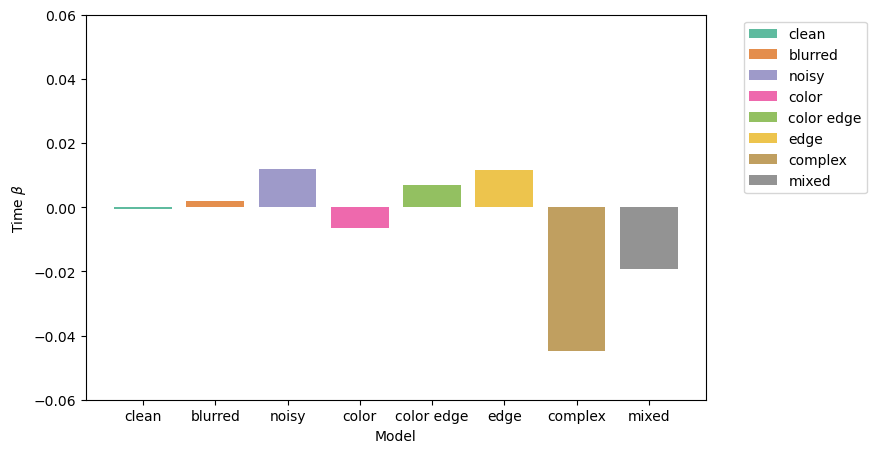

['A1_CL00050_00', 'A1_BL01500_00', 'A1_NO00110_00', 'A1_CO18000_00', 'A1_CE04000_00', 'A1_ED04000_00', 'A1_CX01800_00', 'A1_MI04000_00']


/home/wcp27/.conda/envs/generative/lib/python3.11/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/home/wcp27/.conda/envs/generative/lib/python3.11/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
/tmp/ipykernel_2488201/2048957202.py:43: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  time_corr_spear.append(spearmanr(mod, spec_halluc_rate).statistic)


[-0.0006594737421556706, 0.0, 0.0022491026100562423, 0.022859749752815336, 0.04264323841108294, 0.025372684489708763, -0.02019218990463233, -0.04852905463277625]


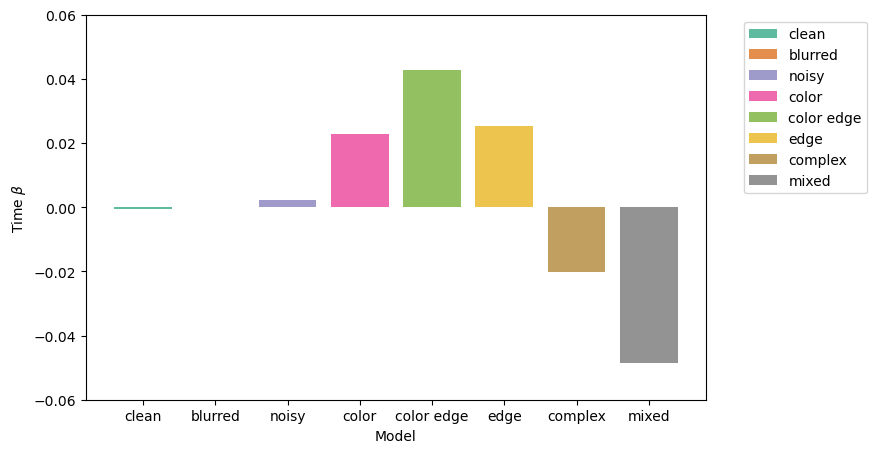

['A1_CL00050_00', 'A1_BL00200_00', 'A1_NO00060_00', 'A1_CO04000_00', 'A1_CE01500_00', 'A1_ED01500_00', 'A1_CX01400_00', 'A1_MI01500_00']


/home/wcp27/.conda/envs/generative/lib/python3.11/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/home/wcp27/.conda/envs/generative/lib/python3.11/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
/tmp/ipykernel_2488201/2048957202.py:43: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  time_corr_spear.append(spearmanr(mod, spec_halluc_rate).statistic)


[-0.0006594737421556706, 0.0, -0.024156999459037085, -0.0018181818181818177, 0.015573770491803281, 0.0062421524663677135, 0.006965166934374143, 0.000749063670411985]


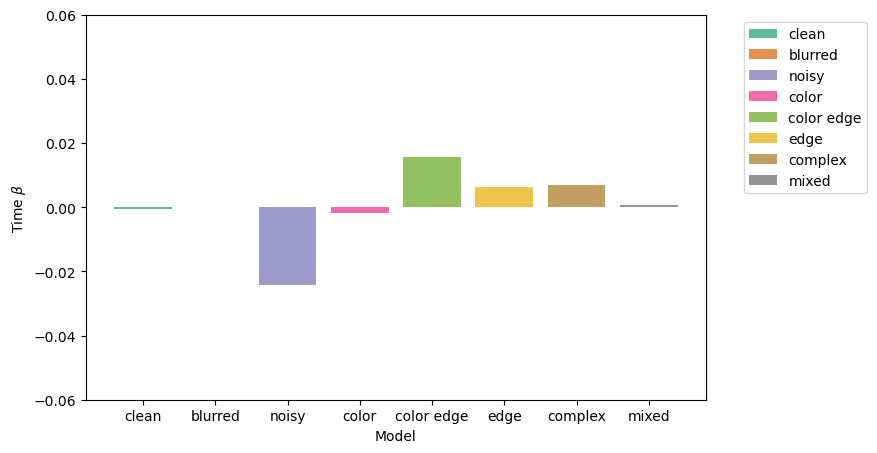

['A0_CL00050_00', 'A0_BL02600_00', 'A0_NO00200_00', 'A0_CO70000_00', 'A0_CE62000_00', 'A0_ED12000_00', 'A0_CX02700_00', 'A0_MI14000_00']
[0.014656025579211817, -0.012814365466127546, -1.8977776146036253e-05, -0.003963705957723164, -0.007054000572102325, 0.00817807132327867, -0.0021564939846006187, -0.020602866445595176]


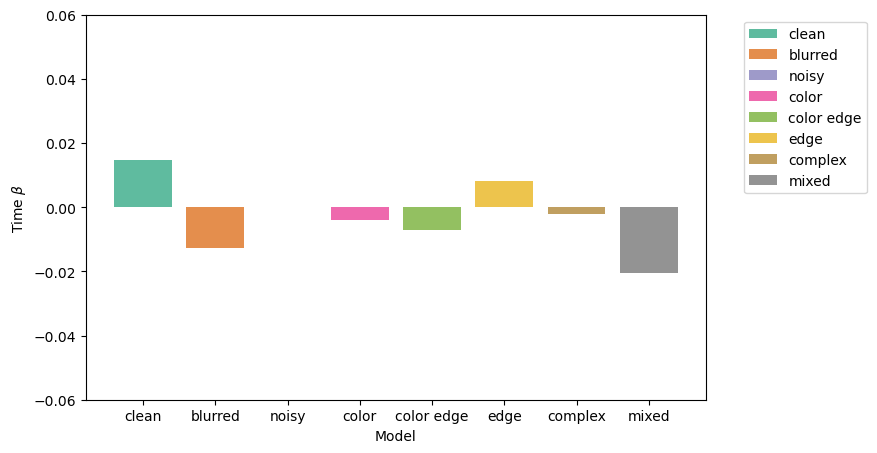

['A0_CL00050_00', 'A0_BL01500_00', 'A0_NO00110_00', 'A0_CO18000_00', 'A0_CE04000_00', 'A0_ED04000_00', 'A0_CX01800_00', 'A0_MI04000_00']


/home/wcp27/.conda/envs/generative/lib/python3.11/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/home/wcp27/.conda/envs/generative/lib/python3.11/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
/tmp/ipykernel_2488201/2048957202.py:43: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  time_corr_spear.append(spearmanr(mod, spec_halluc_rate).statistic)


[0.014656025579211817, 0.0, 0.024136097516076066, 0.016493569908372283, 0.011161156952651168, 0.008733691963700992, 0.038449348076884646, -0.05451601447595296]


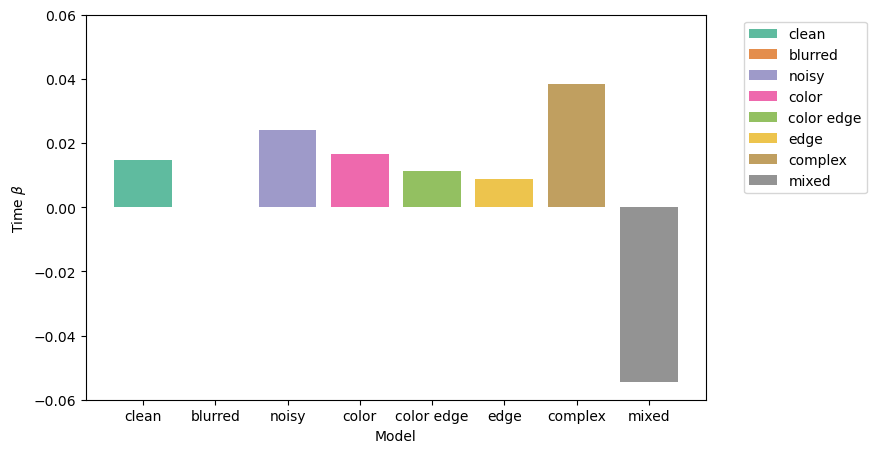

['A0_CL00050_00', 'A0_BL00200_00', 'A0_NO00060_00', 'A0_CO04000_00', 'A0_CE01500_00', 'A0_ED01500_00', 'A0_CX01400_00', 'A0_MI01500_00']


/home/wcp27/.conda/envs/generative/lib/python3.11/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/home/wcp27/.conda/envs/generative/lib/python3.11/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
/tmp/ipykernel_2488201/2048957202.py:43: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  time_corr_spear.append(spearmanr(mod, spec_halluc_rate).statistic)


[0.014656025579211817, 0.0, -0.003323981577581727, 2.194270917860438e-18, 0.0019668390629753577, -0.0008600064473674504, 0.029345662844874425, 0.0006084656084656114]


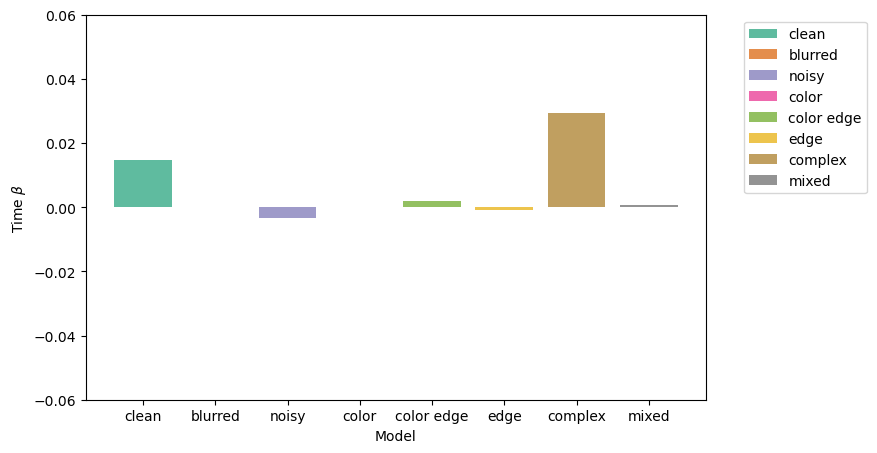

In [4]:
for m_lst in store_models:
    print(m_lst)
    time_lm = []
    time_corr_spear = []
    time_corr_pears = []
    fig, ax = plt.subplots(figsize=(8, 5))
    for i, m in enumerate(m_lst):
        models = ["_".join([m, str(i)]) for i in range(0, count+1)]
        spec_halluc_rate = []
        for model in models:
            #print(model)
            #print('--------------')
            # Test type
            test_type = mdl2dist(model)
            
            # Set data directory
            data_dir = "/".join([proj_dir, "images", "A", model])
        
            # Import csv
            tmp_scene = pd.read_csv("/".join([data_dir, "_".join([model, test_type,"scene_error.csv"])]))
            tmp_agent = pd.read_csv("/".join([data_dir, "_".join([model, test_type,"agent_error.csv"])]))
            tmp_pred = pd.read_csv("/".join([data_dir, "_".join([model, test_type, "pred.csv"])]))

            # Alternative hallucination rate and specificity
            df_halluc = tmp_agent.iloc[0:9, :]
            if any(df_halluc["Count"] > 0):
                tmp_spec_halluc = []
                for j in df_halluc[df_halluc["Count"]>0]["Error"]:
                    # Spec halluc rate
                    halluc_agent = j.split(".")[1]
                    # print(halluc_agent)
                    tmp_spec_halluc.append(df_halluc[df_halluc["Error"]==j]["Count"].values/sum(tmp_agent[tmp_agent["Error"].str.contains("."+halluc_agent)]["Count"].values))

                spec_halluc_rate.append(np.array(tmp_spec_halluc).flatten().mean())
            else:
                spec_halluc_rate.append(0)
        
        tmp_lm = linear_model.LinearRegression().fit(np.array(mod).reshape(-1, 1), np.array(spec_halluc_rate).reshape(-1, 1)).coef_[0][0]
        time_lm.append(tmp_lm)
        ax.bar(i, tmp_lm, alpha=0.7)
        
        time_corr_pears.append(np.corrcoef(mod, spec_halluc_rate)[0,1])
        time_corr_spear.append(spearmanr(mod, spec_halluc_rate).statistic)
    print(time_lm)
    ## Time Correlation
    ax.set_xticks([i for i in range(8)])
    ax.set_xticklabels(["clean", "blurred", "noisy", "color", "color edge", "edge", "complex", "mixed"])
    ax.set_xlabel("Model")
    ax.set_ylabel(r'Time $\beta$')
    plt.ylim(-0.06, 0.06)
    plt.legend(["clean", "blurred", "noisy", "color", "color edge", "edge", "complex", "mixed"], bbox_to_anchor=(1.05, 1.0), loc='upper left')
    plt.show()

In [31]:
spec_rate = np.zeros((48, 5))
i = 0
for m_lst in store_models:
    for m in m_lst:
        models = ["_".join([m, str(i)]) for i in range(0, count+1)]
        for j, model in enumerate(models):
            #print(model)
            #print('--------------')
            # Test type
            test_type = mdl2dist(model)
            
            # Set data directory
            data_dir = "/".join([proj_dir, "images", "A", model])
        
            # Import csv
            tmp_agent = pd.read_csv("/".join([data_dir, "_".join([model, test_type,"agent_error.csv"])]))

            # Alternative hallucination rate and specificity
            df_halluc = tmp_agent.iloc[0:9, :]
            if any(df_halluc["Count"] > 0):
                halluc_n = df_halluc["Count"].values
                spec_rate[i, j] = np.max(halluc_n)/np.sum(halluc_n)
            else:
                spec_rate[i, j] = 0
        i += 1

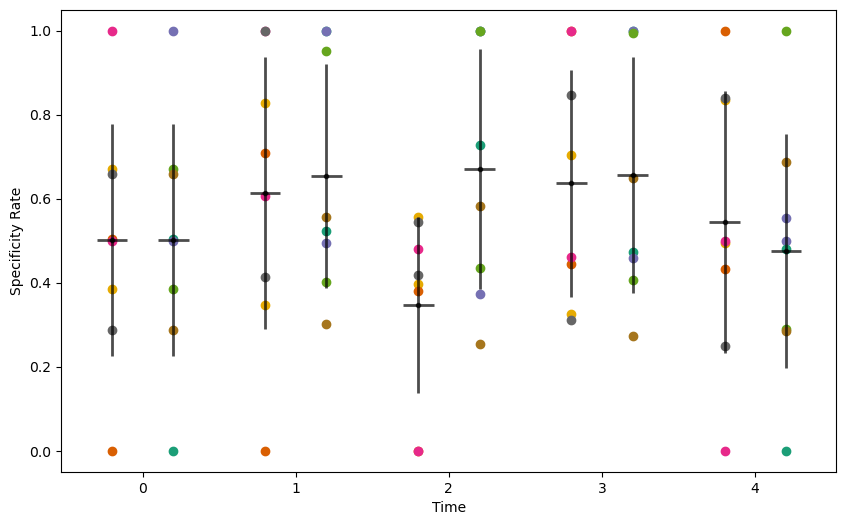

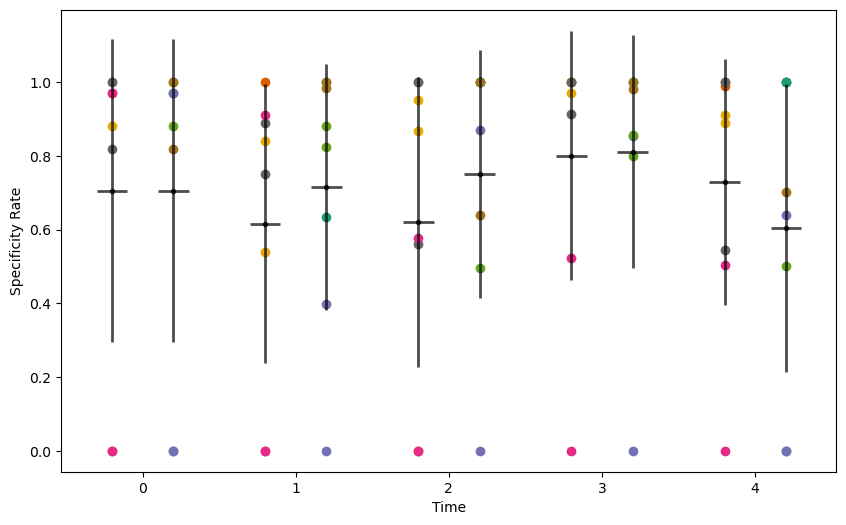

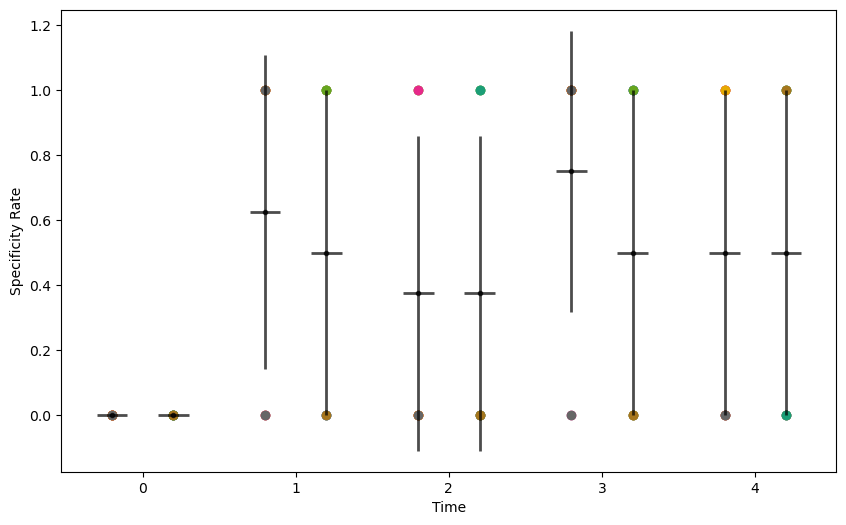

In [75]:
spec_rate = spec_rate.reshape((2, 24, 5))
sslice = [0, 8, 16]
for i in range(len(tmp_sslice)):
    fig, ax = plt.subplots(figsize=(10, 6))
    # Extract data
    tmp_spec_rate = spec_rate[:, sslice[i]:sslice[i]+8, :]

    # Calculate mean and std
    avg = np.mean(tmp_spec_rate, axis=1)
    std = np.std(tmp_spec_rate, axis=1)
    
    # Plot points
    for j in range(5):
        for m in range(8):
            plt.plot(j+0.20, tmp_spec_rate[0, m, j], "o")
            plt.plot(j-0.20, tmp_spec_rate[1, m, j], "o")
    plt.errorbar([i+0.20 for i in range(count+1)], avg[0, :], yerr=std[0, :], 
                 xerr=[0.1]*5, linewidth=2, fmt=".", color="black", alpha=0.7)
    plt.errorbar([i-0.20 for i in range(count+1)], avg[1, :], yerr=std[1, :], 
                 xerr=[0.1]*5, linewidth=2, fmt=".", color="black", alpha=0.7)
    ax.set_xticks([i for i in range(count+1)])
    ax.set_xticklabels(mod)
    ax.set_xlabel("Time")
    ax.set_ylabel("Specificity Rate")
    plt.show()

nan
0.7938753777575226
0.08888593956359352
0.6852088016085291
0.665700750642821


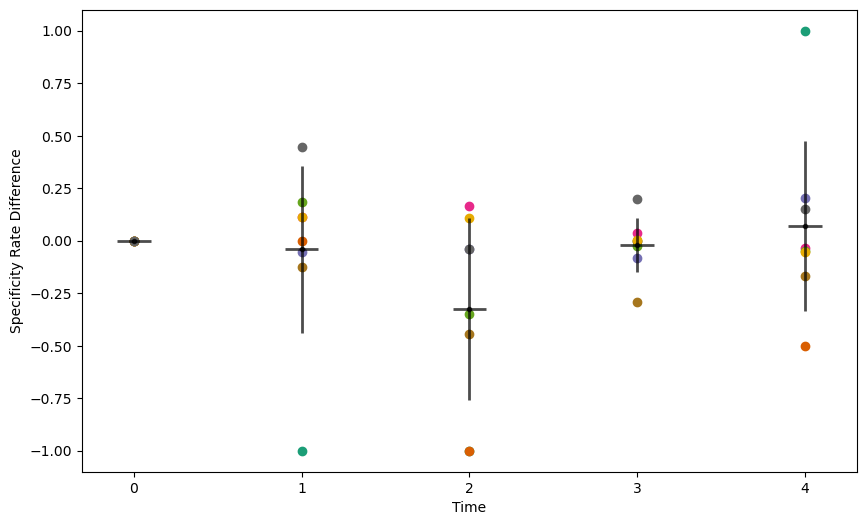

nan
0.5664462748443264
0.39770612453898957
0.8481175425076738
0.45053142558139514


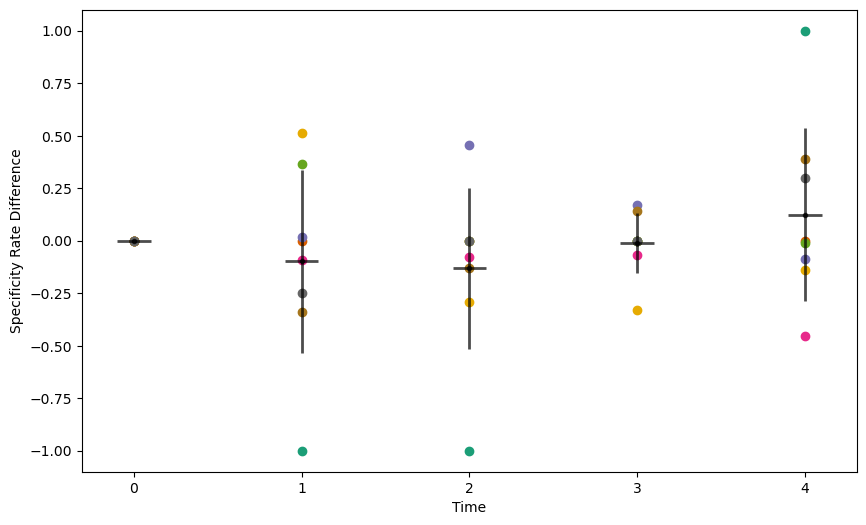

nan
0.6845283355605284
1.0
0.17047066078705375
1.0


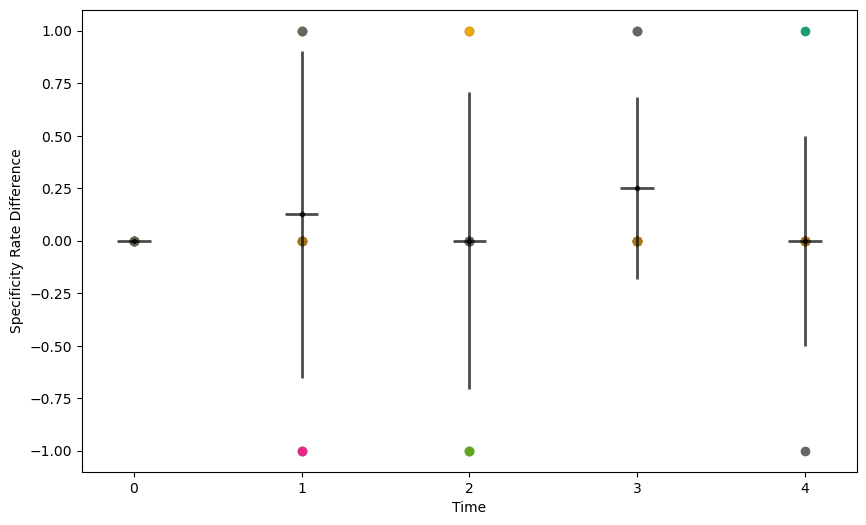

In [98]:
sslice = [0, 8, 16]
for i in range(len(tmp_sslice)):
    fig, ax = plt.subplots(figsize=(10, 6))
    # Extract data
    tmp_spec_rate = spec_rate[:, sslice[i]:sslice[i]+8, :]
    tmp_diff = tmp_spec_rate[1, :, :] - tmp_spec_rate[0, : , :]
    
    # Calculate mean and std
    avg = np.mean(tmp_diff, axis=0)
    std = np.std(tmp_diff, axis=0)

    # Plot points
    for j in range(5):
        # T-test
        t_stat, p_val = ttest_1samp(tmp_diff[:, j], 0)
        print(p)
        if p_val < 0.05:
            plt.text(j+0.15, avg[j], "*")
        elif p_val < 0.01:
            plt.text(j+0.15, avg[j], "**")
        elif p_val < 0.005:
            plt.text(j+0.15, avg[j], "***")
        for m in range(8):
            plt.plot(j, tmp_diff[m, j], "o")
    plt.errorbar([i for i in range(count+1)], avg, yerr=std, 
                 xerr=[0.1]*5, linewidth=2, fmt=".", color="black", alpha=0.7)
    ax.set_xticks([i for i in range(count+1)])
    ax.set_xticklabels(mod)
    ax.set_xlabel("Time")
    ax.set_ylabel("Specificity Rate Difference")
    plt.show()

In [118]:
spec_rate = np.zeros((48, 5))
i = 0
for m_lst in store_models:
    for m in m_lst:
        models = ["_".join([m, str(i)]) for i in range(0, count+1)]
        for j, model in enumerate(models):
            #print(model)
            #print('--------------')
            # Test type
            test_type = mdl2dist(model)
            
            # Set data directory
            data_dir = "/".join([proj_dir, "images", "A", model])
        
            # Import csv
            tmp_agent = pd.read_csv("/".join([data_dir, "_".join([model, test_type,"agent_error.csv"])]))

            # Alternative hallucination rate and specificity
            df_halluc = tmp_agent.iloc[0:9, :]
            if any(df_halluc["Count"] > 0):
                var, tot_var = mulinomial_var(df_halluc["Count"].values)
            else:
                tot_var = 0
            spec_rate[i, j] = tot_var
        i += 1
spec_rate = spec_rate.reshape((2, 24, 5))

In [119]:
spec_rate.shape

(2, 24, 5)

nan
0.7564873818659806
0.21079073933547524
0.5353052345760095
0.7801135151475306


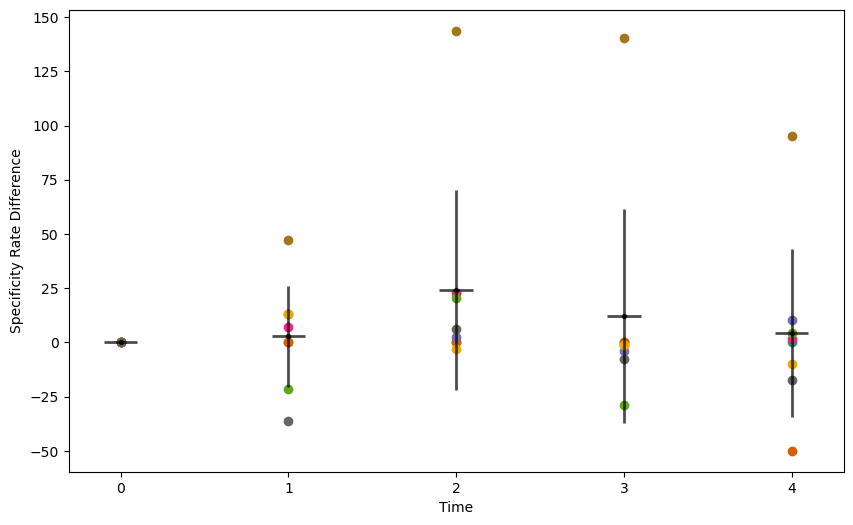

nan
0.7363940374789855
0.4783615087616503
0.3000008050003104
0.32127344226836707


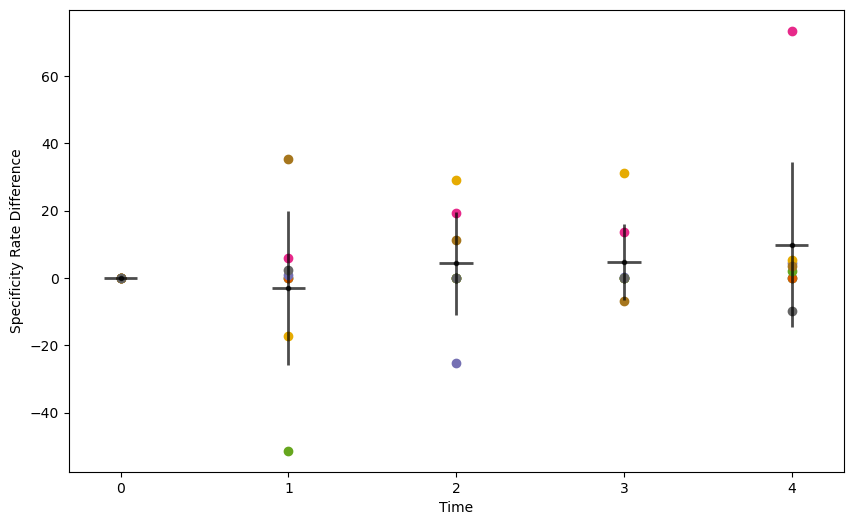

nan
nan
nan
nan
nan


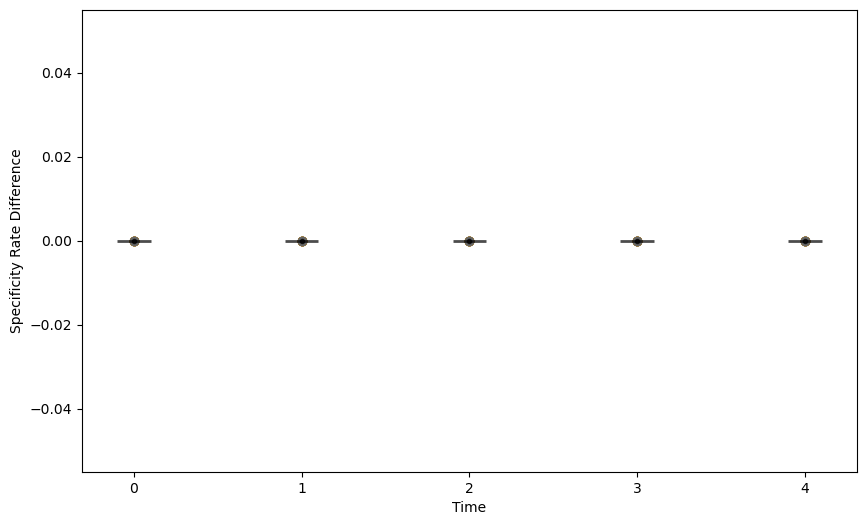

In [122]:
sslice = [0, 8, 16]
for i in range(len(tmp_sslice)):
    fig, ax = plt.subplots(figsize=(10, 6))
    # Extract data
    tmp_spec_rate = spec_rate[:, sslice[i]:sslice[i]+8, :]
    tmp_diff = tmp_spec_rate[1, :, :] - tmp_spec_rate[0, : , :]
    
    # Calculate mean and std
    avg = np.mean(tmp_diff, axis=0)
    std = np.std(tmp_diff, axis=0)

    # Plot points
    for j in range(5):
        # T-test
        t_stat, p_val = ttest_1samp(tmp_diff[:, j], 0)
        print(p_val)
        if p_val < 0.05:
            plt.text(j+0.15, avg[j], "*")
        elif p_val < 0.01:
            plt.text(j+0.15, avg[j], "**")
        elif p_val < 0.005:
            plt.text(j+0.15, avg[j], "***")
        for m in range(8):
            plt.plot(j, tmp_diff[m, j], "o")
    plt.errorbar([i for i in range(count+1)], avg, yerr=std, 
                 xerr=[0.1]*5, linewidth=2, fmt=".", color="black", alpha=0.7)
    ax.set_xticks([i for i in range(count+1)])
    ax.set_xticklabels(mod)
    ax.set_xlabel("Time")
    ax.set_ylabel("Specificity Rate Difference")
    plt.show()

In [5]:
def log_lik_ratio(acc_probdist, err_probdist, halluc_count, normalize = False):
    # Calculate log likelihoods
    acc_l = multinomial.pmf(halluc_count, np.sum(halluc_count), acc_probdist)
    err_l = multinomial.pmf(halluc_count, np.sum(halluc_count), err_probdist)

    if acc_l == 0 or err_l == 0: # log(0) undefined
        ll_ratio = np.nan
    else:
        acc_ll = np.log(acc_l)
        err_ll = np.log(err_l)

        # Log-likelihood Ratio
        ll_ratio = acc_ll - err_ll

    # Normalize if requested
    if normalize:
        ll_ratio = ll_ratio/np.sum(halluc_count)

    return(ll_ratio)

['A1_CL00050_00', 'A1_BL02600_00', 'A1_NO00200_00', 'A1_CO70000_00', 'A1_CE62000_00', 'A1_ED12000_00', 'A1_CX02700_00', 'A1_MI14000_00']


/tmp/ipykernel_1106327/2340289693.py:46: RuntimeWarning: Mean of empty slice
  conf_dist.append(np.nanmean(np.array(tmp_conf_dist)))


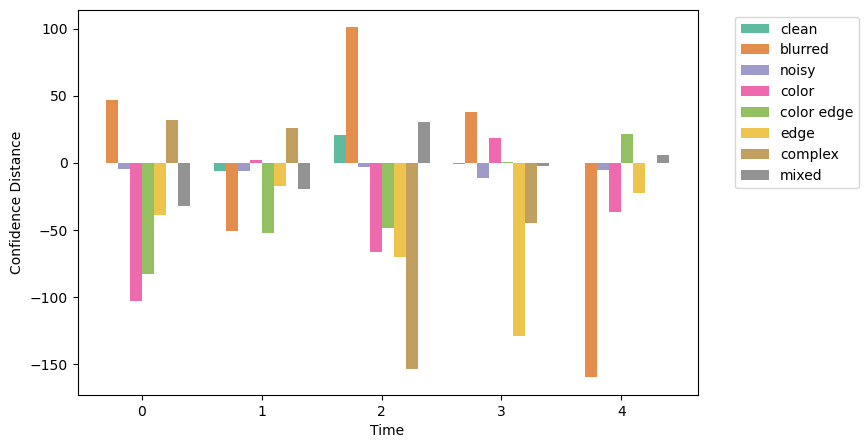

['A1_CL00050_00', 'A1_BL01500_00', 'A1_NO00110_00', 'A1_CO18000_00', 'A1_CE04000_00', 'A1_ED04000_00', 'A1_CX01800_00', 'A1_MI04000_00']


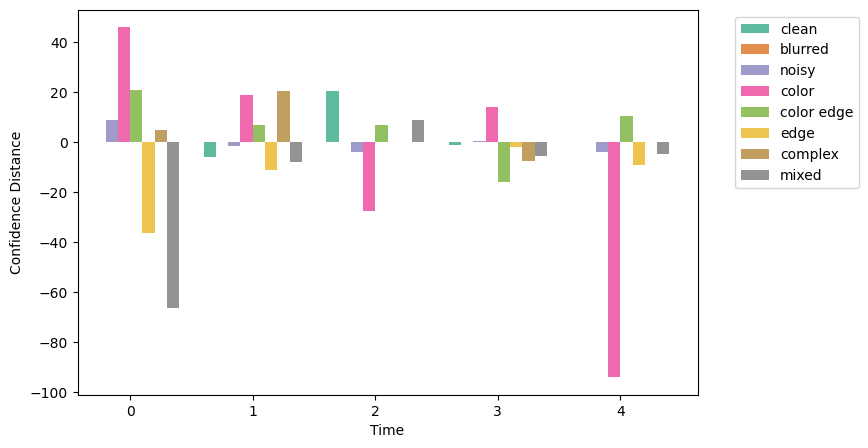

['A1_CL00050_00', 'A1_BL00200_00', 'A1_NO00060_00', 'A1_CO04000_00', 'A1_CE01500_00', 'A1_ED01500_00', 'A1_CX01400_00', 'A1_MI01500_00']


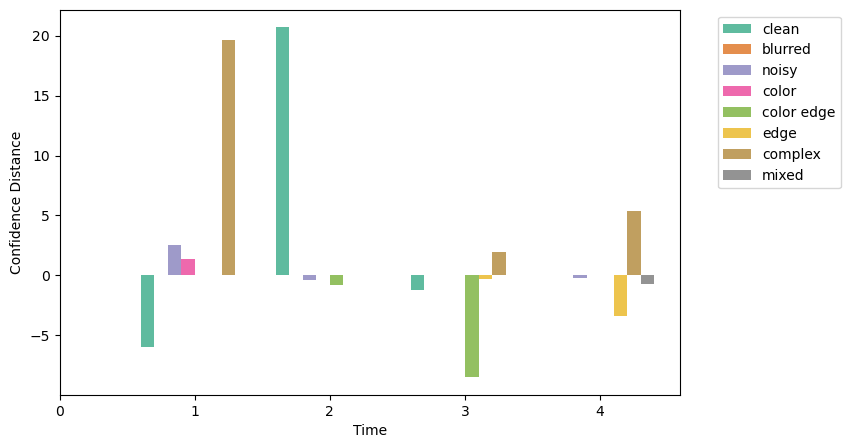

['A0_CL00050_00', 'A0_BL02600_00', 'A0_NO00200_00', 'A0_CO70000_00', 'A0_CE62000_00', 'A0_ED12000_00', 'A0_CX02700_00', 'A0_MI14000_00']


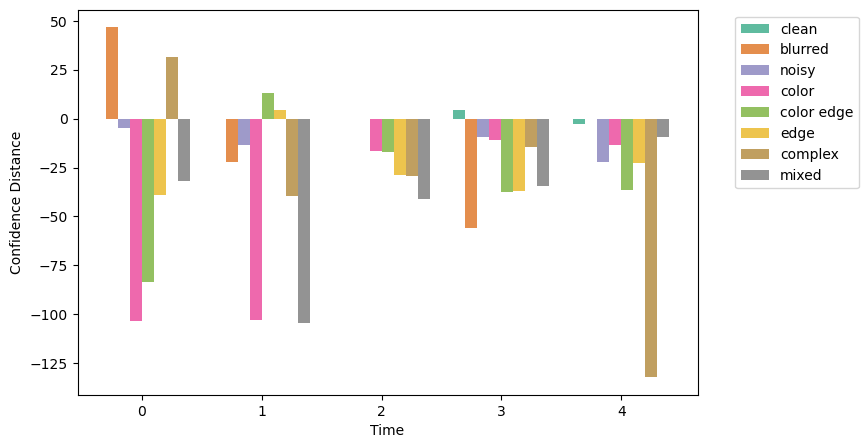

['A0_CL00050_00', 'A0_BL01500_00', 'A0_NO00110_00', 'A0_CO18000_00', 'A0_CE04000_00', 'A0_ED04000_00', 'A0_CX01800_00', 'A0_MI04000_00']


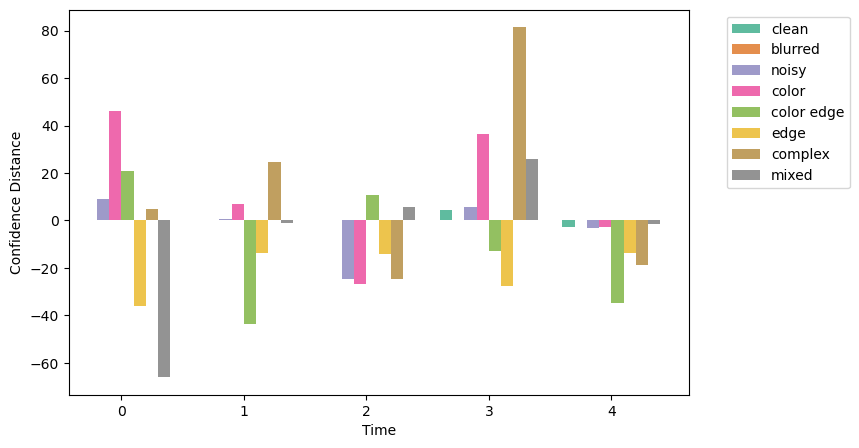

['A0_CL00050_00', 'A0_BL00200_00', 'A0_NO00060_00', 'A0_CO04000_00', 'A0_CE01500_00', 'A0_ED01500_00', 'A0_CX01400_00', 'A0_MI01500_00']


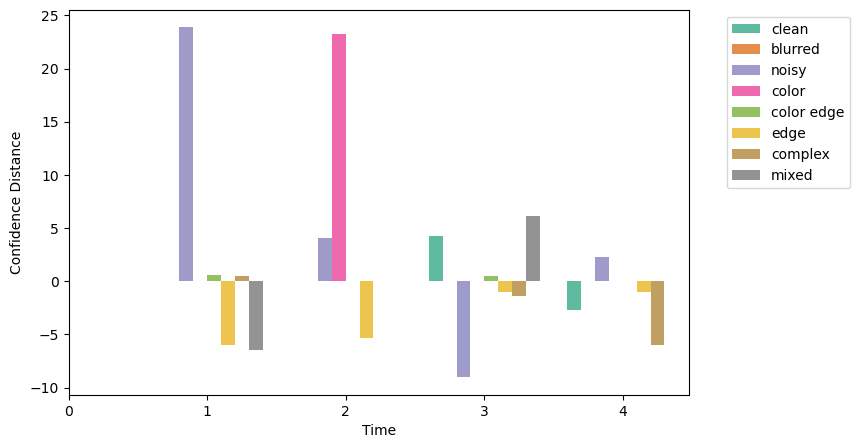

In [6]:
barwidth=0.2
mid = np.array([-0.35, -0.25, -0.15, -0.05, 0.05, 0.15, 0.25, 0.35])
mod = range(count+1)
for m_lst in store_models:
    print(m_lst)
    store_conf = []
    fig, ax = plt.subplots(figsize=(8, 5))
    for i, m in enumerate(m_lst):
        models = ["_".join([m, str(i)]) for i in range(0, count+1)]
        conf_dist = []
        for model in models:
            # Get test type
            test_type = mdl2dist(model)
        
            # Set data directory
            data_dir = "/".join([proj_dir, "images", "A", model])
            
            # Import csv
            tmp_agent = pd.read_csv("/".join([data_dir, "_".join([model, test_type,"agent_error.csv"])]))
            tmp_pred = pd.read_csv("/".join([data_dir, "_".join([model, test_type, "pred.csv"])]))
            
            # Alternative hallucination rate and specificity
            df_halluc = tmp_agent.iloc[0:9, :]
            
            # Alternative hallucination rate and specificity
            df_halluc = tmp_agent.iloc[0:9, :]
            tmp_conf_dist = []
            if any(df_halluc["Count"] > 0):
                for j in df_halluc[df_halluc["Count"]>0]["Error"]:
                    # Spec halluc rate
                    halluc_agent = j.split(".")[1]
        
                    # Confidence
                    tmp_halluc_conf = tmp_pred[(tmp_pred["Agent"] == "none") & (tmp_pred["PredAgent"] == halluc_agent)]["ConfAgent"].values
                    tmp_acc_conf = tmp_pred[(tmp_pred["Agent"] == halluc_agent) & (tmp_pred["PredAgent"] == halluc_agent)]["ConfAgent"].values
                    tmp_err_conf = tmp_pred[(tmp_pred["Agent"] != halluc_agent) & (tmp_pred["Agent"] != "none") & (tmp_pred["PredAgent"] == halluc_agent)]["ConfAgent"].values

                    # Confidence Distance
                    if len(tmp_acc_conf) == 0 or len(tmp_err_conf) == 0:
                        tmp_conf_dist.append(np.nan)
                    else:
                        halluc_count = conf_bin(tmp_halluc_conf)
                        acc_pd = conf_bin(tmp_acc_conf, normalize=True)
                        err_pd = conf_bin(tmp_err_conf, normalize=True)
                        tmp_conf_dist.append(log_lik_ratio(acc_pd, err_pd, halluc_count, normalize=False))
                conf_dist.append(np.nanmean(np.array(tmp_conf_dist)))
            else:
                conf_dist.append(np.nan)

        ## Confidence
        ax.bar(np.array(mod)+mid[i], conf_dist, width=0.1, alpha=0.7)
        ax.set_xticks([i for i in range(count+1)])
        ax.set_xticklabels(mod)
        ax.set_xlabel("Time")
        ax.set_ylabel("Confidence Distance")
    #plt.ylim(0.2, 1.01)
    plt.legend(["clean", "blurred", "noisy", "color", "color edge", "edge", "complex", "mixed"], bbox_to_anchor=(1.05, 1.0), loc='upper left')
    plt.show()

['A1_CL00050_00', 'A1_BL02600_00', 'A1_NO00200_00', 'A1_CO70000_00', 'A1_CE62000_00', 'A1_ED12000_00', 'A1_CX02700_00', 'A1_MI14000_00']


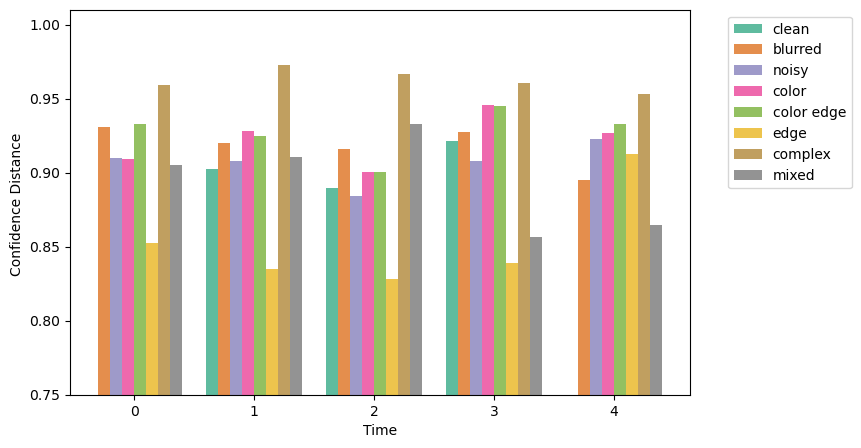

['A1_CL00050_00', 'A1_BL01500_00', 'A1_NO00110_00', 'A1_CO18000_00', 'A1_CE04000_00', 'A1_ED04000_00', 'A1_CX01800_00', 'A1_MI04000_00']


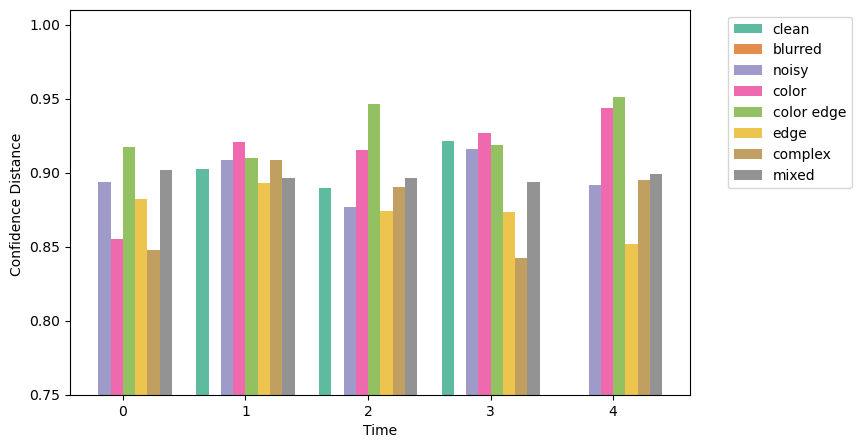

['A1_CL00050_00', 'A1_BL00200_00', 'A1_NO00060_00', 'A1_CO04000_00', 'A1_CE01500_00', 'A1_ED01500_00', 'A1_CX01400_00', 'A1_MI01500_00']


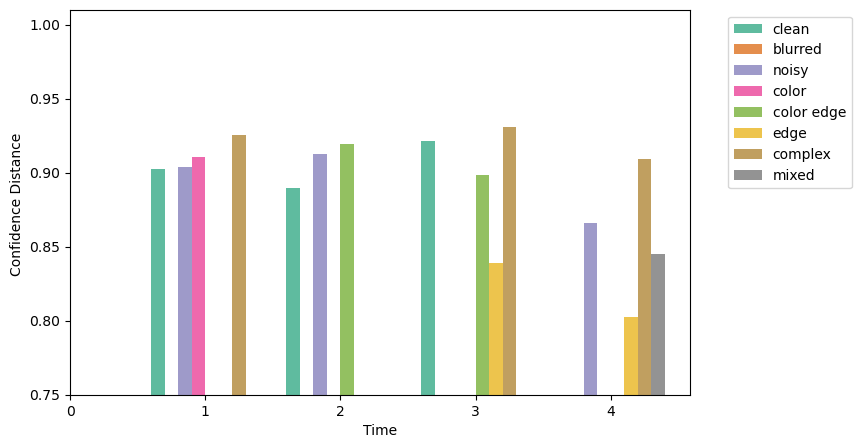

['A0_CL00050_00', 'A0_BL02600_00', 'A0_NO00200_00', 'A0_CO70000_00', 'A0_CE62000_00', 'A0_ED12000_00', 'A0_CX02700_00', 'A0_MI14000_00']


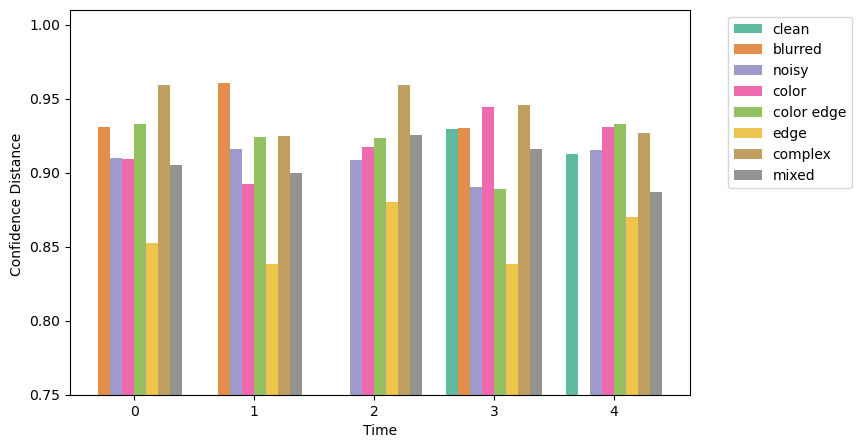

['A0_CL00050_00', 'A0_BL01500_00', 'A0_NO00110_00', 'A0_CO18000_00', 'A0_CE04000_00', 'A0_ED04000_00', 'A0_CX01800_00', 'A0_MI04000_00']


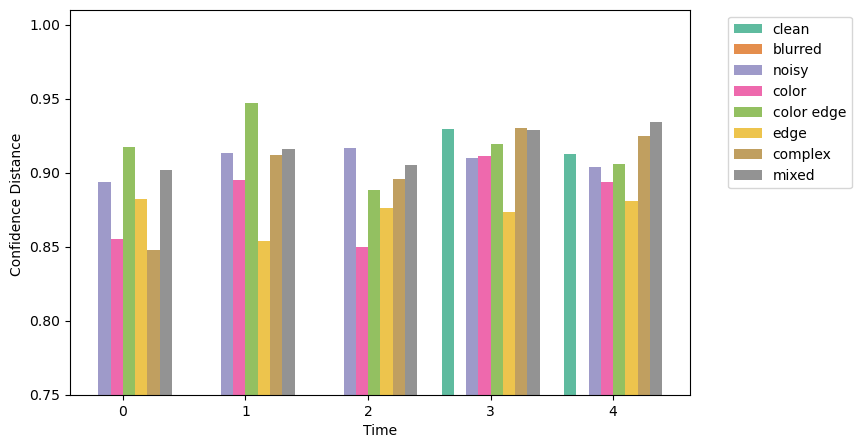

['A0_CL00050_00', 'A0_BL00200_00', 'A0_NO00060_00', 'A0_CO04000_00', 'A0_CE01500_00', 'A0_ED01500_00', 'A0_CX01400_00', 'A0_MI01500_00']


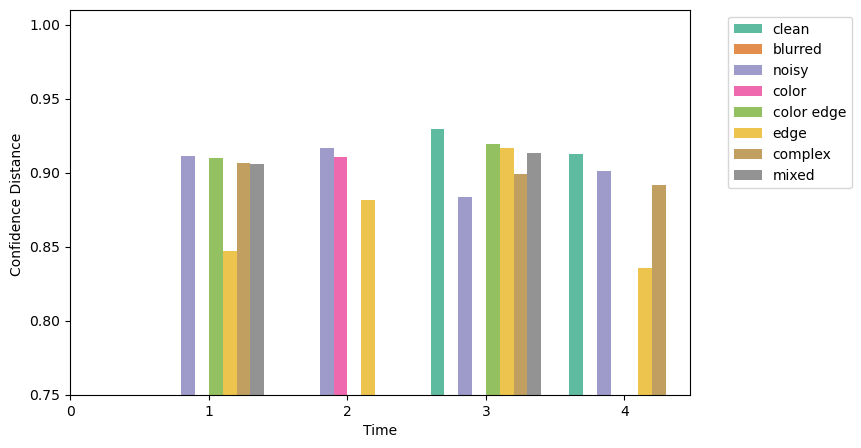

In [7]:
barwidth=0.2
mid = np.array([-0.35, -0.25, -0.15, -0.05, 0.05, 0.15, 0.25, 0.35])
mod = range(count+1)
for m_lst in store_models:
    print(m_lst)
    store_conf = []
    fig, ax = plt.subplots(figsize=(8, 5))
    for i, m in enumerate(m_lst):
        models = ["_".join([m, str(i)]) for i in range(0, count+1)]
        conf_dist = []
        for model in models:
            # Test type
            test_type = mdl2dist(model)
            
            # Set data directory
            data_dir = "/".join([proj_dir, "images", "A", model])
        
            # Import csv
            tmp_agent = pd.read_csv("/".join([data_dir, "_".join([model, test_type,"agent_error.csv"])]))
            tmp_pred = pd.read_csv("/".join([data_dir, "_".join([model, test_type, "pred.csv"])]))

            # Alternative hallucination rate and specificity
            df_halluc = tmp_agent.iloc[0:9, :]
            if any(df_halluc["Count"] > 0):
                spec_rate.append(df_halluc["Count"].max()/sum(df_halluc["Count"].values))
                tmp_spec_halluc = []
                tmp_conf_dist = []
                for j in df_halluc[df_halluc["Count"]>0]["Error"]:
                    # Spec halluc rate
                    halluc_agent = j.split(".")[1]

                    # Confidence
                    #fig, ax = plt.subplots(figsize=(8, 5))
                    tmp_halluc_conf = tmp_pred[(tmp_pred["Agent"] == "none") & (tmp_pred["PredAgent"] == halluc_agent)]["ConfAgent"].values
                    tmp_err_conf = tmp_pred[(tmp_pred["Agent"] != halluc_agent) & (tmp_pred["PredAgent"] == halluc_agent)]["ConfAgent"].values
                    tmp_acc_conf = tmp_pred[(tmp_pred["Agent"] == halluc_agent) & (tmp_pred["PredAgent"] == halluc_agent)]["ConfAgent"].values
                    if len(tmp_acc_conf) == 0:
                        tmp_conf_dist.append(np.nan)
                    else:
                        tmp_conf_dist.append(wasserstein_distance(tmp_acc_conf, tmp_halluc_conf))

                conf_dist.append(1/(np.nanmean(np.array(tmp_conf_dist))+1))
            else:
                conf_dist.append(np.nan)
            store_conf.append(conf_dist)

        ## Confidence
        ax.bar(np.array(mod)+mid[i], conf_dist, width=0.1, alpha=0.7)
        ax.set_xticks([i for i in range(count+1)])
        ax.set_xticklabels(mod)
        ax.set_xlabel("Time")
        ax.set_ylabel("Confidence Distance ")
    plt.ylim(0.75, 1.01)
    plt.legend(["clean", "blurred", "noisy", "color", "color edge", "edge", "complex", "mixed"], bbox_to_anchor=(1.05, 1.0), loc='upper left')
    plt.show()

['A1_CL00050_00', 'A1_BL02600_00', 'A1_NO00200_00', 'A1_CO70000_00', 'A1_CE62000_00', 'A1_ED12000_00', 'A1_CX02700_00', 'A1_MI14000_00']
[0, -0.006486756505488257, 0.0025415269256367943, 0.005298171977936174, 0.002058719475085146, 0.012343167725762993, -0.0023809790332991352, -0.013361308251060654]


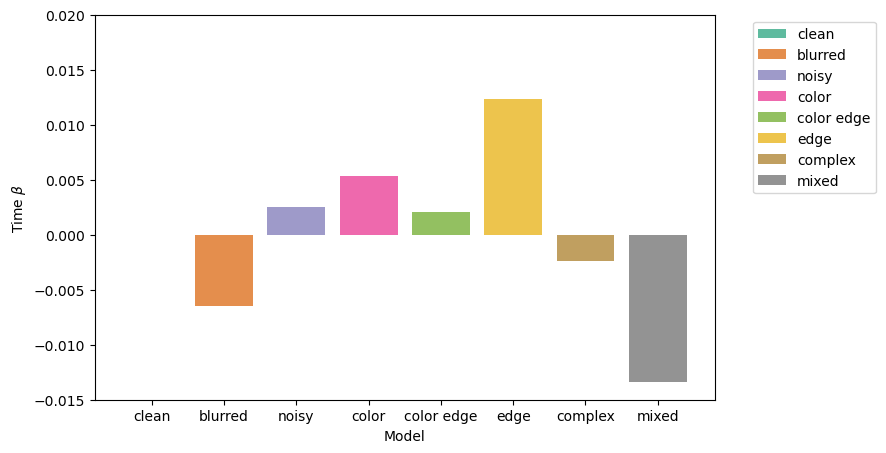

['A1_CL00050_00', 'A1_BL01500_00', 'A1_NO00110_00', 'A1_CO18000_00', 'A1_CE04000_00', 'A1_ED04000_00', 'A1_CX01800_00', 'A1_MI04000_00']
[0, 0, 0.00022969856892656173, 0.018320278979629245, 0.007549951185934955, -0.007977038271831183, 0.0028780254676889286, -0.0007340721773071658]


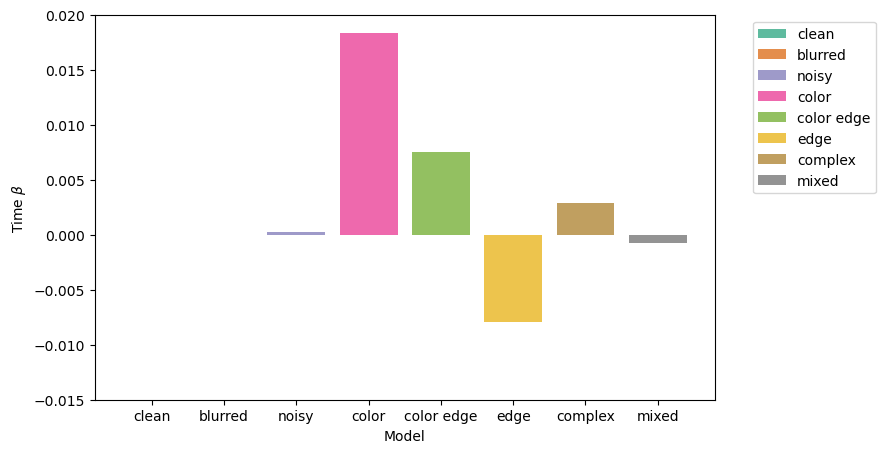

['A1_CL00050_00', 'A1_BL00200_00', 'A1_NO00060_00', 'A1_CO04000_00', 'A1_CE01500_00', 'A1_ED01500_00', 'A1_CX01400_00', 'A1_MI01500_00']
[0, 0, 0, 0, 0, 0, 0, 0]


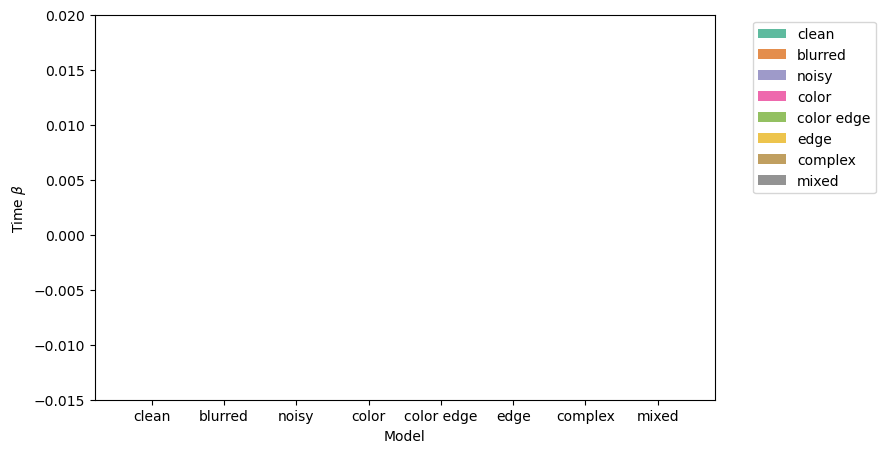

['A0_CL00050_00', 'A0_BL02600_00', 'A0_NO00200_00', 'A0_CO70000_00', 'A0_CE62000_00', 'A0_ED12000_00', 'A0_CX02700_00', 'A0_MI14000_00']
[0, 0, -0.0015833196880616018, 0.009526281748505016, -0.0034147870575593226, 0.003391647996215363, -0.004301999655374557, -0.001953666009954846]


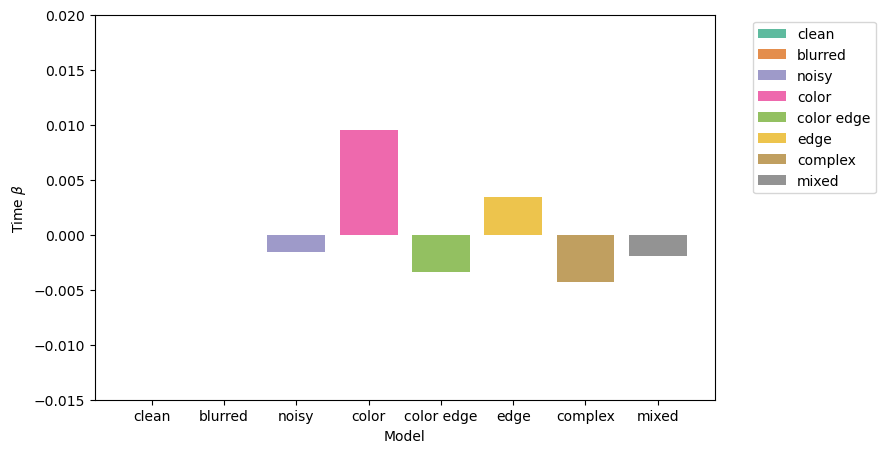

['A0_CL00050_00', 'A0_BL01500_00', 'A0_NO00110_00', 'A0_CO18000_00', 'A0_CE04000_00', 'A0_ED04000_00', 'A0_CX01800_00', 'A0_MI04000_00']
[0, 0, 0.0016484781174411099, 0.009373897494987318, -0.0051207135098660156, 0.0017242496138407553, 0.017213416053795595, 0.007850236878733185]


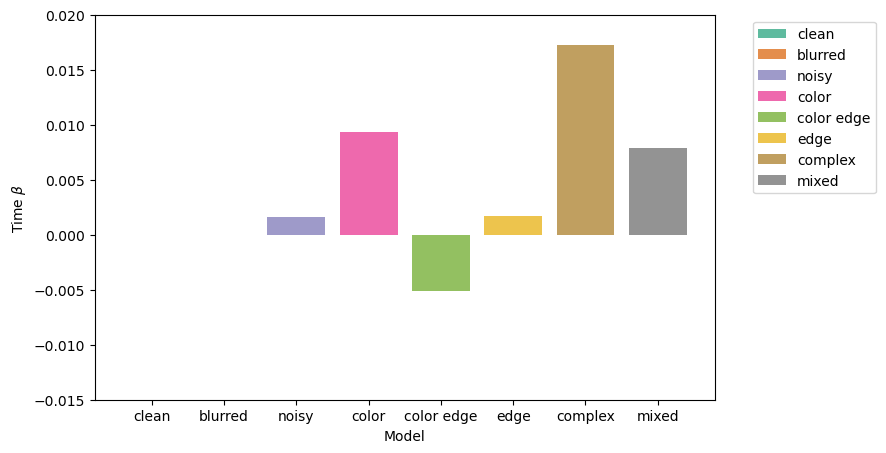

['A0_CL00050_00', 'A0_BL00200_00', 'A0_NO00060_00', 'A0_CO04000_00', 'A0_CE01500_00', 'A0_ED01500_00', 'A0_CX01400_00', 'A0_MI01500_00']
[0, 0, -0.006309981784512363, 0, 0, 0.00012113572524436002, 0, 0]


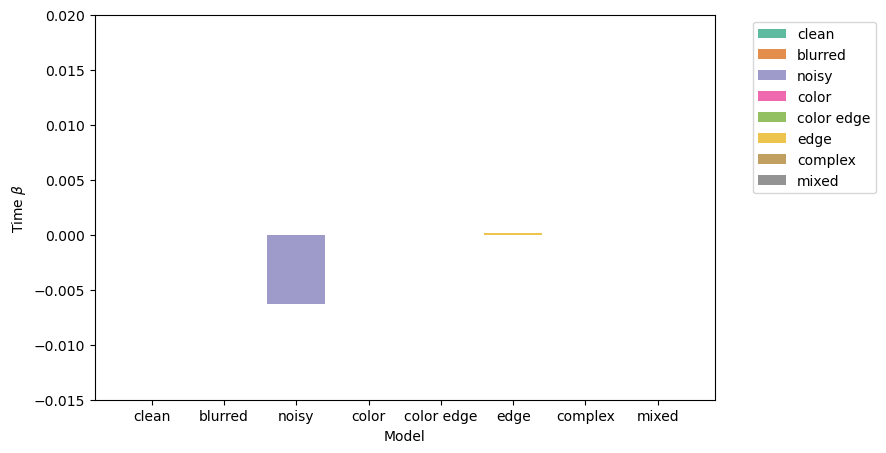

In [8]:
count = 4
mod = range(count+1)
for m_lst in store_models:
    print(m_lst)
    time_lm = []
    fig, ax = plt.subplots(figsize=(8, 5))
    for i, m in enumerate(m_lst):
        models = ["_".join([m, str(i)]) for i in range(0, count+1)]
        conf_dist = []
        for model in models:
            #print(model)
            #print('--------------')
            # Test type
            test_type = mdl2dist(model)
            
            # Set data directory
            data_dir = "/".join([proj_dir, "images", "A", model])
        
            # Import csv
            tmp_agent = pd.read_csv("/".join([data_dir, "_".join([model, test_type,"agent_error.csv"])]))
            tmp_pred = pd.read_csv("/".join([data_dir, "_".join([model, test_type, "pred.csv"])]))

            # Alternative hallucination rate and specificity
            df_halluc = tmp_agent.iloc[0:9, :]
            if any(df_halluc["Count"] > 0):
                spec_rate.append(df_halluc["Count"].max()/sum(df_halluc["Count"].values))
                tmp_spec_halluc = []
                tmp_conf_dist = []
                for j in df_halluc[df_halluc["Count"]>0]["Error"]:
                    # Spec halluc rate
                    halluc_agent = j.split(".")[1]

                    # Confidence
                    #fig, ax = plt.subplots(figsize=(8, 5))
                    tmp_halluc_conf = tmp_pred[(tmp_pred["Agent"] == "none") & (tmp_pred["PredAgent"] == halluc_agent)]["ConfAgent"].values
                    tmp_err_conf = tmp_pred[(tmp_pred["Agent"] != halluc_agent) & (tmp_pred["PredAgent"] == halluc_agent)]["ConfAgent"].values
                    tmp_acc_conf = tmp_pred[(tmp_pred["Agent"] == halluc_agent) & (tmp_pred["PredAgent"] == halluc_agent)]["ConfAgent"].values
                    if len(tmp_acc_conf) == 0:
                        tmp_conf_dist.append(np.nan)
                    else:
                        tmp_conf_dist.append(wasserstein_distance(tmp_acc_conf, tmp_halluc_conf))

                conf_dist.append(1/(np.nanmean(np.array(tmp_conf_dist))+1))
            else:
                conf_dist.append(np.nan)
        
        tmp_time = np.array(mod)[~np.isnan(conf_dist)].reshape(-1, 1)
        if len(tmp_time) > 3:
            tmp_conf = np.array(conf_dist)[~np.isnan(conf_dist)].reshape(-1, 1)
            tmp_lm = linear_model.LinearRegression().fit(tmp_time, tmp_conf).coef_[0][0]
        else:
            tmp_lm = 0
        time_lm.append(tmp_lm)
        ax.bar(i, tmp_lm, alpha=0.7)

    print(time_lm)
    ## Time Correlation
    ax.set_xticks([i for i in range(8)])
    ax.set_xticklabels(["clean", "blurred", "noisy", "color", "color edge", "edge", "complex", "mixed"])
    ax.set_xlabel("Model")
    ax.set_ylabel(r'Time $\beta$')
    plt.ylim(-0.015, 0.02)
    plt.legend(["clean", "blurred", "noisy", "color", "color edge", "edge", "complex", "mixed"], bbox_to_anchor=(1.05, 1.0), loc='upper left')
    plt.show()

In [16]:
tmp_agent[0:9]["Count"].values

array([ 0,  0,  0, 18,  0,  0,  0,  0,  0])

In [11]:
df_halluc

,Error,Count
0,none.cap,0
1,none.camera,0
2,none.boot,0
3,none.bird,0
4,none.cat,0
5,none.dog,0
6,none.baby,0
7,none.woman,0
8,none.man,0


A1_CL00050_00
['A1_CL00050_00_0', 'A1_CL00050_00_1', 'A1_CL00050_00_2', 'A1_CL00050_00_3', 'A1_CL00050_00_4']
[[ 0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.]
 [ 0. 18. 88. 17.  0.]
 [ 0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.]]


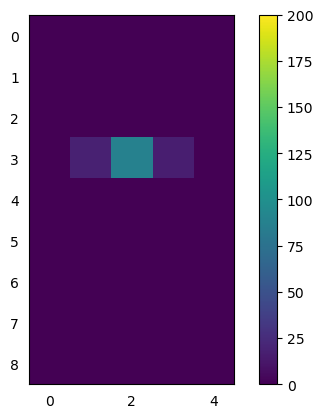

A1_BL01500_00
['A1_BL01500_00_0', 'A1_BL01500_00_1', 'A1_BL01500_00_2', 'A1_BL01500_00_3', 'A1_BL01500_00_4']
[[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]


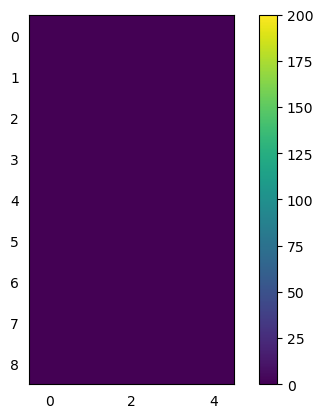

A1_NO00110_00
['A1_NO00110_00_0', 'A1_NO00110_00_1', 'A1_NO00110_00_2', 'A1_NO00110_00_3', 'A1_NO00110_00_4']
[[ 0.  0. 24.  0.  0.]
 [ 0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.]
 [ 2.  3. 66.  2.  0.]
 [ 0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.]
 [30. 14. 42.  8. 10.]
 [ 0.  0.  0.  0.  0.]
 [ 2.  0.  1.  0.  0.]]


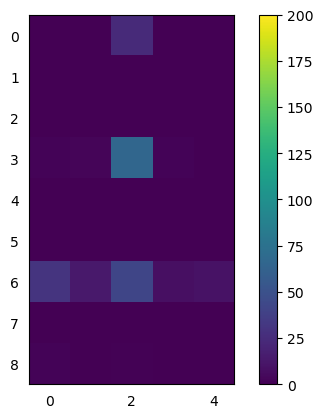

A1_CO18000_00
['A1_CO18000_00_0', 'A1_CO18000_00_1', 'A1_CO18000_00_2', 'A1_CO18000_00_3', 'A1_CO18000_00_4']
[[  0.   3.   0.   0.   0.]
 [  0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.]
 [104. 175.  98. 108. 184.]
 [ 23.   0.  55.   2.   0.]
 [  0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.]]


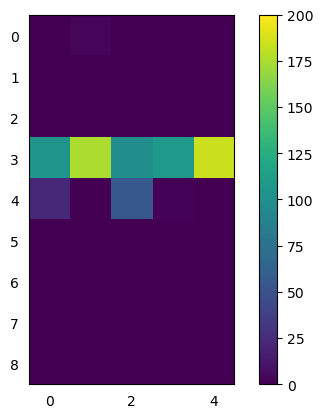

A1_CE04000_00
['A1_CE04000_00_0', 'A1_CE04000_00_1', 'A1_CE04000_00_2', 'A1_CE04000_00_3', 'A1_CE04000_00_4']
[[  0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.]
 [  3. 140. 124. 213. 189.]
 [  0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.]
 [ 99.  81.   0.   0.   0.]
 [  0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.]]


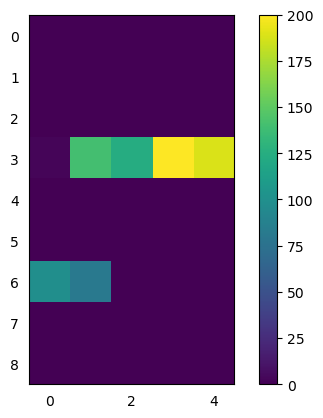

A1_ED04000_00
['A1_ED04000_00_0', 'A1_ED04000_00_1', 'A1_ED04000_00_2', 'A1_ED04000_00_3', 'A1_ED04000_00_4']
[[  0.  47.   0.   1.   0.]
 [  0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.]
 [  3.  46.  15.  16.  56.]
 [  0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.]
 [100.  25. 100. 100. 100.]
 [  0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.]]


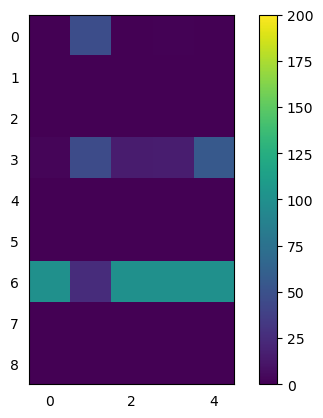

A1_CX01800_00
['A1_CX01800_00_0', 'A1_CX01800_00_1', 'A1_CX01800_00_2', 'A1_CX01800_00_3', 'A1_CX01800_00_4']
[[ 0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.]
 [ 2. 12.  0.  0.  0.]
 [ 0.  0.  1.  8.  2.]
 [ 0.  0.  0.  0.  0.]
 [ 0. 89.  0. 48.  2.]
 [ 0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.]]


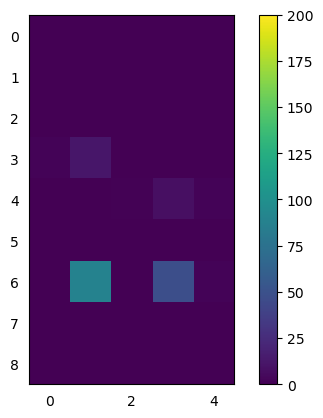

A1_MI04000_00
['A1_MI04000_00_0', 'A1_MI04000_00_1', 'A1_MI04000_00_2', 'A1_MI04000_00_3', 'A1_MI04000_00_4']
[[  0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.]
 [  0. 100.   5.   8.  14.]
 [  0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.]
 [100.   0.   0.   0.  33.]
 [  0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.]]


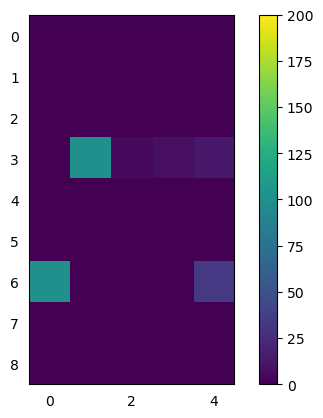

A0_CL00050_00
['A0_CL00050_00_0', 'A0_CL00050_00_1', 'A0_CL00050_00_2', 'A0_CL00050_00_3', 'A0_CL00050_00_4']
[[ 0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.]
 [ 0.  0.  0. 21. 10.]
 [ 0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.]]


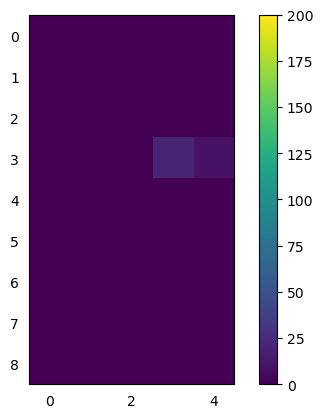

A0_BL01500_00
['A0_BL01500_00_0', 'A0_BL01500_00_1', 'A0_BL01500_00_2', 'A0_BL01500_00_3', 'A0_BL01500_00_4']
[[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]


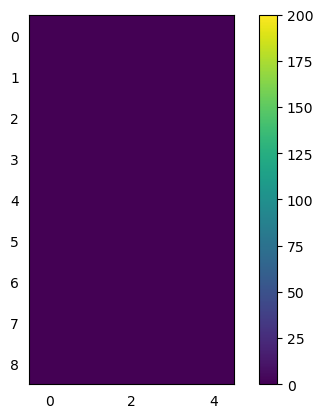

A0_NO00110_00
['A0_NO00110_00_0', 'A0_NO00110_00_1', 'A0_NO00110_00_2', 'A0_NO00110_00_3', 'A0_NO00110_00_4']
[[ 0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.]
 [ 2. 21.  4.  2.  5.]
 [ 0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.]
 [30.  4. 80. 68. 51.]
 [ 0.  0.  0.  0.  0.]
 [ 2.  0.  0.  0.  0.]]


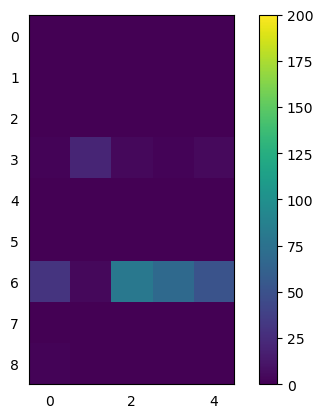

A0_CO18000_00
['A0_CO18000_00_0', 'A0_CO18000_00_1', 'A0_CO18000_00_2', 'A0_CO18000_00_3', 'A0_CO18000_00_4']
[[  0.  10.   6.   0.  96.]
 [  0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.]
 [104.  81. 128. 178. 184.]
 [ 23.   0.  94.  17.  58.]
 [  0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.]]


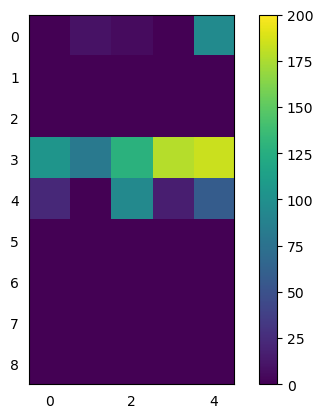

A0_CE04000_00
['A0_CE04000_00_0', 'A0_CE04000_00_1', 'A0_CE04000_00_2', 'A0_CE04000_00_3', 'A0_CE04000_00_4']
[[  0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.]
 [  3. 200. 177. 114. 188.]
 [  0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.]
 [ 99.   0.   0.   0.   2.]
 [  0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.]]


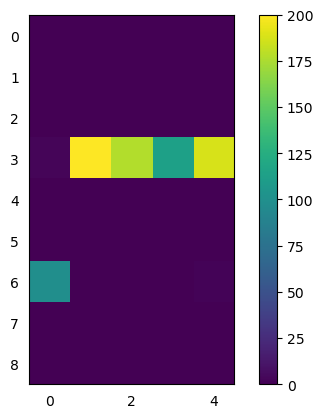

A0_ED04000_00
['A0_ED04000_00_0', 'A0_ED04000_00_1', 'A0_ED04000_00_2', 'A0_ED04000_00_3', 'A0_ED04000_00_4']
[[  0. 101. 100.  82.  25.]
 [  0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.]
 [  3.  10.  73.   9.  92.]
 [  0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.]
 [100.   0.   0. 100.  66.]
 [  0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.]]


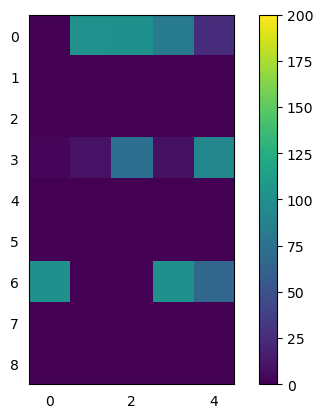

A0_CX01800_00
['A0_CX01800_00_0', 'A0_CX01800_00_1', 'A0_CX01800_00_2', 'A0_CX01800_00_3', 'A0_CX01800_00_4']
[[  0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.]
 [  2.  85.  13. 100.   5.]
 [  0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.]
 [  0. 100.  86.   0.  40.]
 [  0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.]]


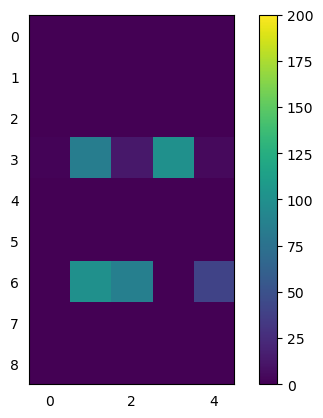

A0_MI04000_00
['A0_MI04000_00_0', 'A0_MI04000_00_1', 'A0_MI04000_00_2', 'A0_MI04000_00_3', 'A0_MI04000_00_4']
[[  0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.]
 [  0.   3.  55.  72.   6.]
 [  0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.]
 [100.   9.   0.   0.   0.]
 [  0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.]]


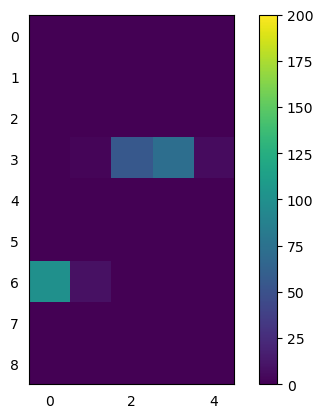

In [27]:
for m_lst in [exp_mid, noe_mid]:
    for m in m_lst:
        print(m)
        models = ["_".join([m, str(i)]) for i in range(0, 5)]
        print(models)
        conf_mat = np.zeros((9, 5))
        for i, model in enumerate(models):
            # Test type
            test_type = mdl2dist(model)
            
            # Set data directory
            data_dir = "/".join([proj_dir, "images", "A", model])

            # Import csv
            tmp_agent = pd.read_csv("/".join([data_dir, "_".join([model, test_type,"agent_error.csv"])]))
            
            # Extract data
            conf_mat[:, i] = tmp_agent[0:9]["Count"].values
        print(conf_mat)
        plt.tick_params(left = False, bottom = False) 
        plt.imshow(conf_mat, vmin=0, vmax=200)
        plt.colorbar()
        plt.show()

['A1_CL00050_00', 'A1_BL02600_00', 'A1_NO00200_00', 'A1_CO70000_00', 'A1_CE62000_00', 'A1_ED12000_00', 'A1_CX02700_00', 'A1_MI14000_00']


/home/wcp27/.conda/envs/generative/lib/python3.11/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/home/wcp27/.conda/envs/generative/lib/python3.11/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


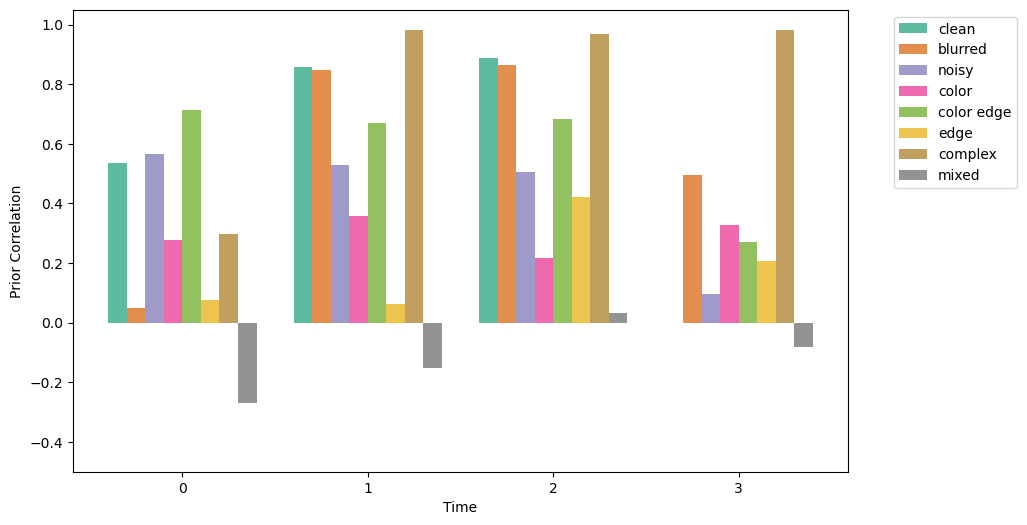

['A1_CL00050_00', 'A1_BL01500_00', 'A1_NO00110_00', 'A1_CO18000_00', 'A1_CE04000_00', 'A1_ED04000_00', 'A1_CX01800_00', 'A1_MI04000_00']


/home/wcp27/.conda/envs/generative/lib/python3.11/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/home/wcp27/.conda/envs/generative/lib/python3.11/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
/home/wcp27/.conda/envs/generative/lib/python3.11/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/home/wcp27/.conda/envs/generative/lib/python3.11/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
/home/wcp27/.conda/envs/generative/lib/python3.11/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/home/wcp27/.conda/envs/generative/lib/python3.11/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered i

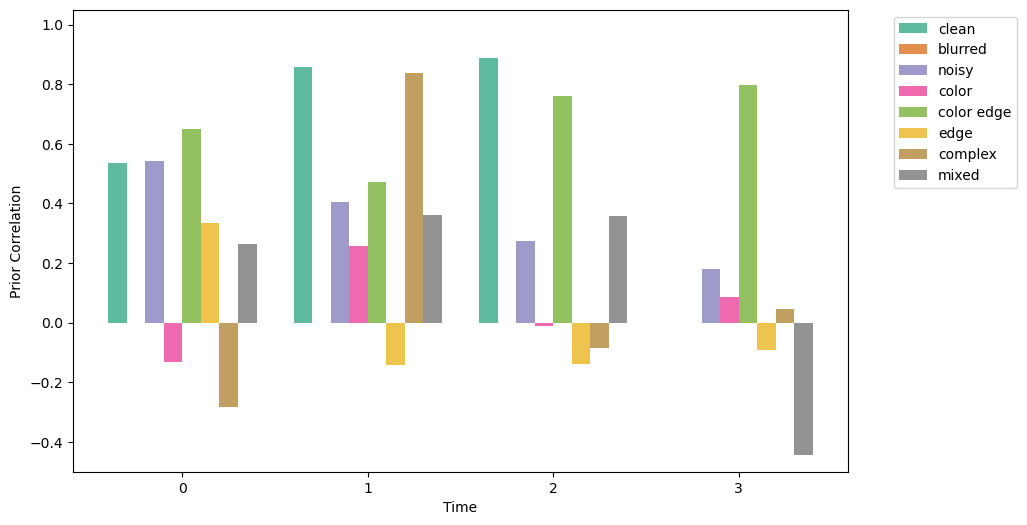

['A1_CL00050_00', 'A1_BL00200_00', 'A1_NO00060_00', 'A1_CO04000_00', 'A1_CE01500_00', 'A1_ED01500_00', 'A1_CX01400_00', 'A1_MI01500_00']


/home/wcp27/.conda/envs/generative/lib/python3.11/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/home/wcp27/.conda/envs/generative/lib/python3.11/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
/home/wcp27/.conda/envs/generative/lib/python3.11/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/home/wcp27/.conda/envs/generative/lib/python3.11/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
/home/wcp27/.conda/envs/generative/lib/python3.11/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/home/wcp27/.conda/envs/generative/lib/python3.11/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered i

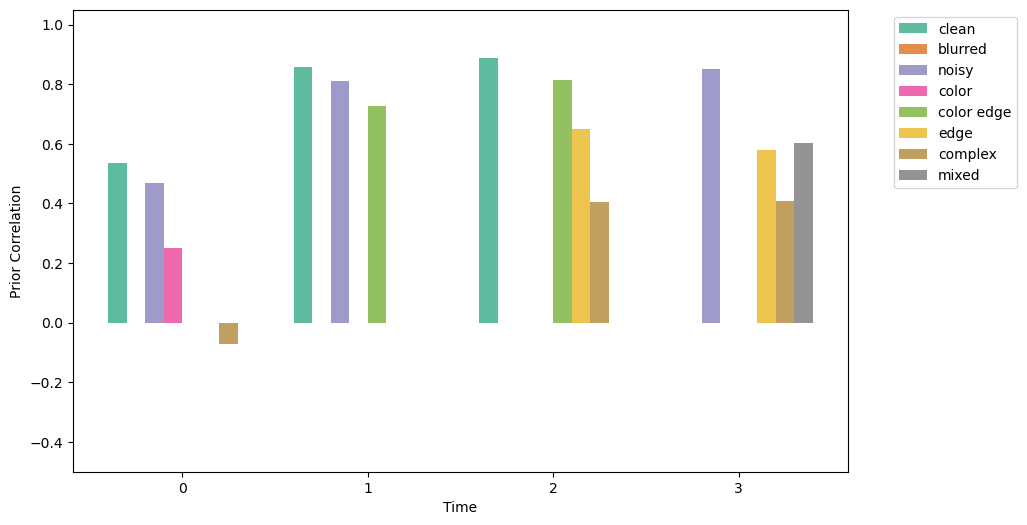

In [22]:
mod = range(count)
barwidth=0.2
mid = np.array([-0.35, -0.25, -0.15, -0.05, 0.05, 0.15, 0.25, 0.35])
for m_lst in [exp_high, exp_mid, exp_low]:
    print(m_lst)
    fig, ax = plt.subplots(figsize=(10, 6))
    for i, m in enumerate(m_lst):
        prior_corr_pears = []
        models = ["_".join([m, str(i+1)]) for i in range(0, count)]
        for model in models:
            # Test type
            test_type = mdl2dist(model)
            
            # Set data directory
            data_dir = "/".join([proj_dir, "images", "A", model])
        
            # Import csv
            tmp_agent = pd.read_csv("/".join([data_dir, "_".join([model, test_type,"agent_error.csv"])]))
            tmp_pred = pd.read_csv("/".join([data_dir, "_".join([model, test_type, "pred.csv"])]))

            # Alternative hallucination rate and specificity 
            df_halluc = tmp_agent.iloc[0:9, :]
            spec_halluc_rate = []
            for agent in ["cap", "camera", "boot", "bird", "cat", "dog", "baby", "woman", "man"]:
                tmp_sum = sum(tmp_agent[tmp_agent["Error"].str.contains("."+agent)]["Count"].values)
                if tmp_sum > 0:
                    spec_halluc_rate.append(df_halluc[df_halluc["Error"]=="none."+agent]["Count"].values[0]/tmp_sum)
                else:
                    spec_halluc_rate.append(0)
            
            spec_halluc_rate = np.array(spec_halluc_rate)
            
            # Alpha
            alphas = open("/".join([data_dir, "_".join([model, "alpha.txt"])])).readline()
            alphas = alphas.replace(' ', '').replace('[', '').replace(']', '')
            alphas = np.array([int(i) for i in alphas.split(",")]).flatten()[1:]

            # Correlation
            #print(spec_halluc_rate, alphas)
            prior_corr_pears.append(np.corrcoef(spec_halluc_rate, alphas)[0,1])
        
        ## Confidence
        ax.bar(np.array(mod)+mid[i], prior_corr_pears, width=0.1, alpha=0.7)
        ax.set_xticks([i for i in range(count)])
        ax.set_xticklabels(mod)
        ax.set_xlabel("Time")
        ax.set_ylabel("Prior Correlation")
    plt.ylim(-0.50, 1.05)
    plt.legend(["clean", "blurred", "noisy", "color", "color edge", "edge", "complex", "mixed"], bbox_to_anchor=(1.05, 1.0), loc='upper left')
    plt.show()

A0_CE04000_00_0
bird
0.6083634530546749


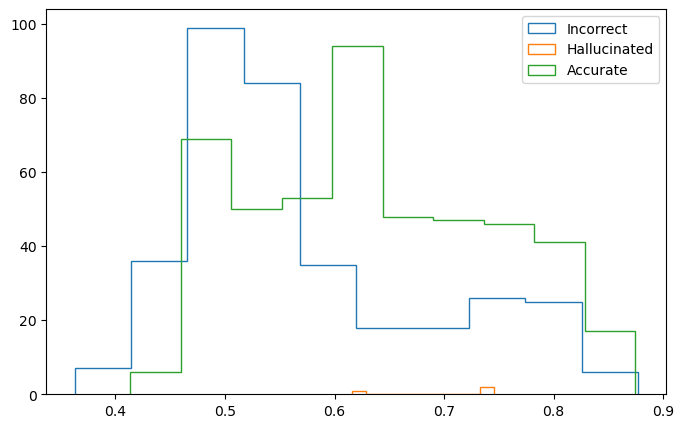

baby
-0.11451612651103517


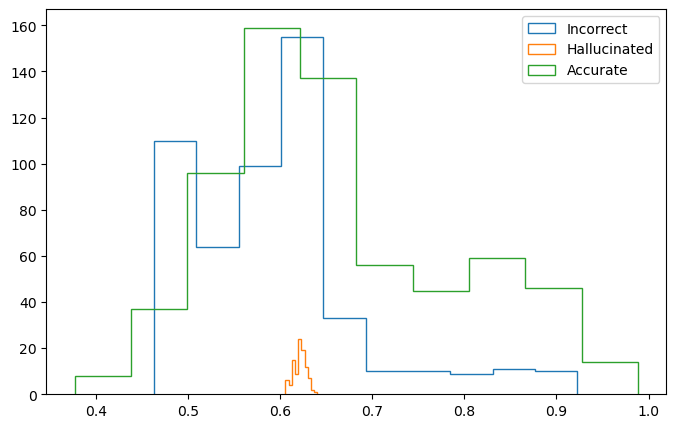

A0_CX01800_00_0
bird
1.7725162961137928


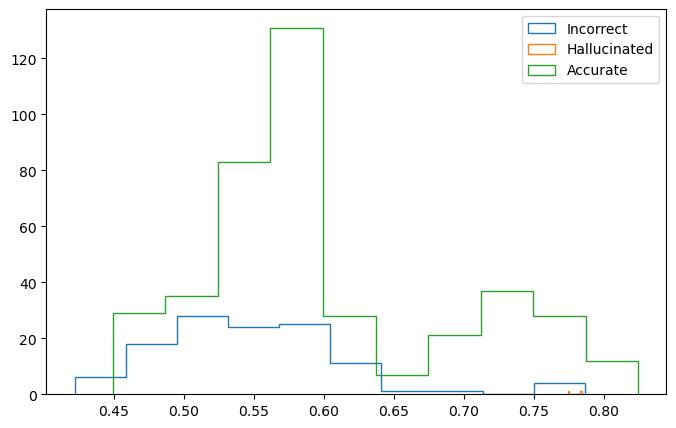

In [35]:
from scipy.stats import multinomial
from analysis.utils import mdl2dist, calc_error_rate
for m in ["A0_CE04000_00", "A0_CX01800_00"]:
    #models = ["_".join([m, str(i)]) for i in range(0, count+1)]
    models = [m+"_0"]
    for model in models:
        print(model)
        # Get test type
        test_type = mdl2dist(model)
    
        # Set data directory
        data_dir = "/".join([proj_dir, "images", model])
        
        # Import csv
        tmp_agent = pd.read_csv("/".join([data_dir, "_".join([model, test_type,"agent_error.csv"])]))
        tmp_pred = pd.read_csv("/".join([data_dir, "_".join([model, test_type, "pred.csv"])]))
    
        # Alternative hallucination rate and specificity
        df_halluc = tmp_agent.iloc[0:9, :]
        if any(df_halluc["Count"] > 0):
            for j in df_halluc[df_halluc["Count"]>0]["Error"]:
                # Spec halluc rate
                halluc_agent = j.split(".")[1]
                print(halluc_agent)
    
                # Confidence
                fig, ax = plt.subplots(figsize=(8, 5))
                tmp_halluc_conf = tmp_pred[(tmp_pred["Agent"] == "none") & (tmp_pred["PredAgent"] == halluc_agent)]["ConfAgent"].values
                halluc_count = conf_bin(tmp_halluc_conf)
                tmp_acc_conf = tmp_pred[(tmp_pred["Agent"] == halluc_agent) & (tmp_pred["PredAgent"] == halluc_agent)]["ConfAgent"].values
                acc_pd = conf_bin(tmp_acc_conf, normalize=True)
                tmp_err_conf = tmp_pred[(tmp_pred["Agent"] != halluc_agent) & (tmp_pred["PredAgent"] == halluc_agent)]["ConfAgent"].values
                err_pd = conf_bin(tmp_err_conf, normalize=True)
                print(log_lik_ratio(acc_pd, err_pd, halluc_count, normalize=True))

                
                plt.hist(tmp_err_conf, histtype="step")
                plt.hist(tmp_halluc_conf, histtype="step")
                plt.hist(tmp_acc_conf, histtype="step")
                plt.legend(["Incorrect", "Hallucinated", "Accurate"])
                plt.show()

['A1_CL00050_00', 'A1_BL02600_00', 'A1_NO00200_00', 'A1_CO70000_00', 'A1_CE62000_00', 'A1_ED12000_00', 'A1_CX02700_00', 'A1_MI14000_00']


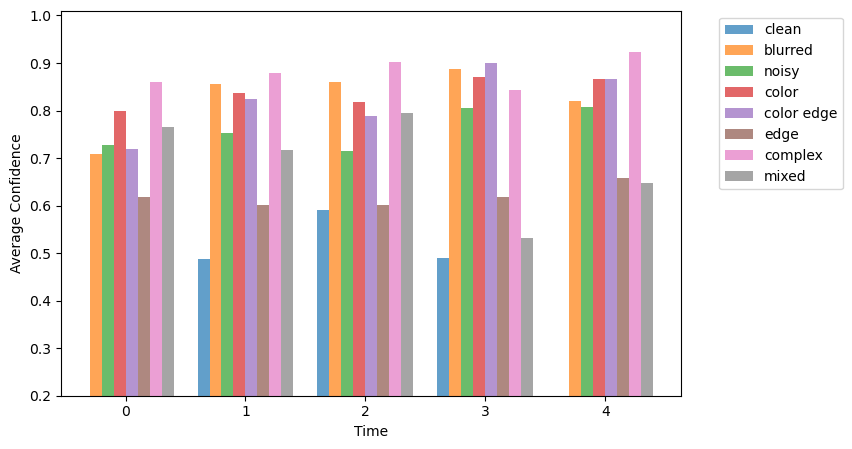

['A1_CL00050_00', 'A1_BL01500_00', 'A1_NO00110_00', 'A1_CO18000_00', 'A1_CE04000_00', 'A1_ED04000_00', 'A1_CX01800_00', 'A1_MI04000_00']


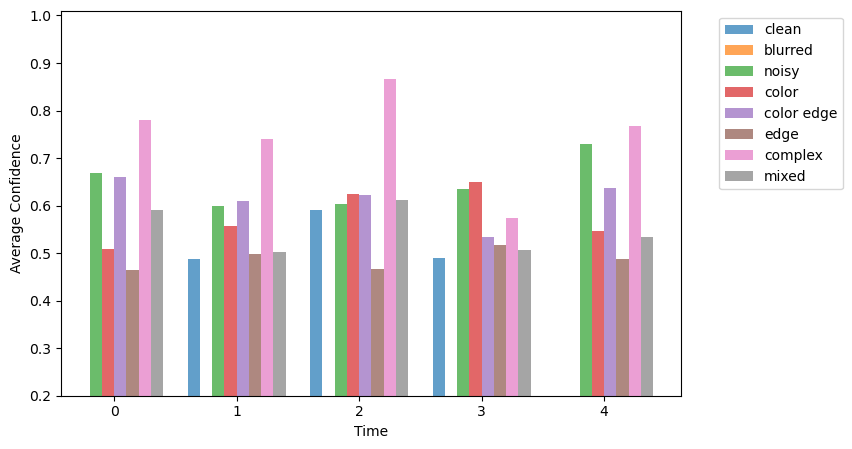

['A1_CL00050_00', 'A1_BL00200_00', 'A1_NO00060_00', 'A1_CO04000_00', 'A1_CE01500_00', 'A1_ED01500_00', 'A1_CX01400_00', 'A1_MI01500_00']


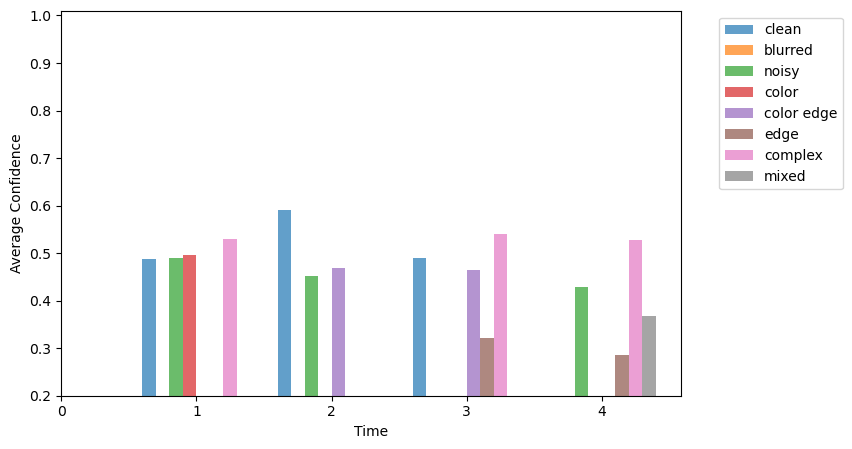

['A0_CL00050_00', 'A0_BL02600_00', 'A0_NO00200_00', 'A0_CO70000_00', 'A0_CE62000_00', 'A0_ED12000_00', 'A0_CX02700_00', 'A0_MI14000_00']


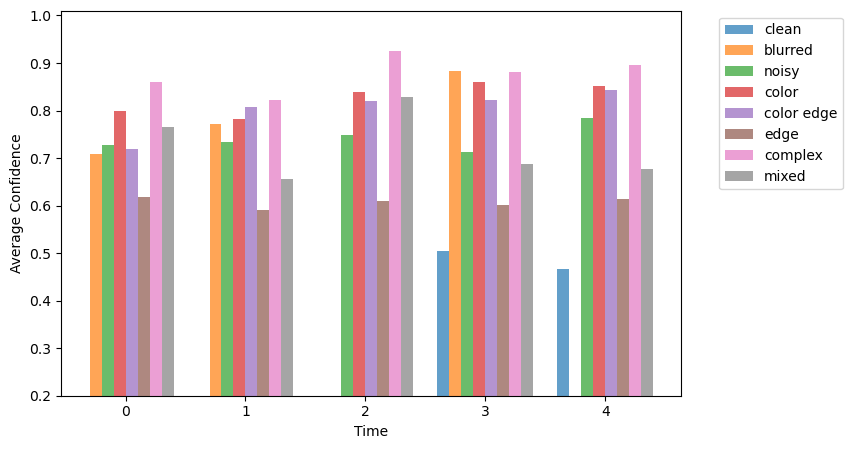

['A0_CL00050_00', 'A0_BL01500_00', 'A0_NO00110_00', 'A0_CO18000_00', 'A0_CE04000_00', 'A0_ED04000_00', 'A0_CX01800_00', 'A0_MI04000_00']


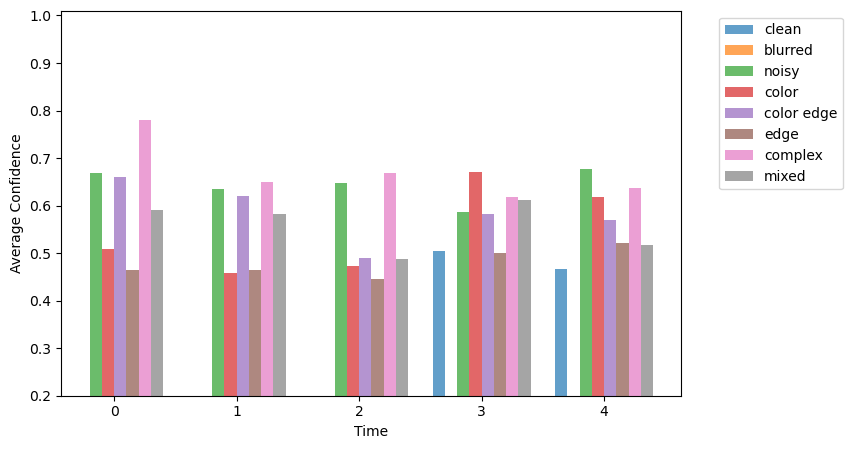

['A0_CL00050_00', 'A0_BL00200_00', 'A0_NO00060_00', 'A0_CO04000_00', 'A0_CE01500_00', 'A0_ED01500_00', 'A0_CX01400_00', 'A0_MI01500_00']


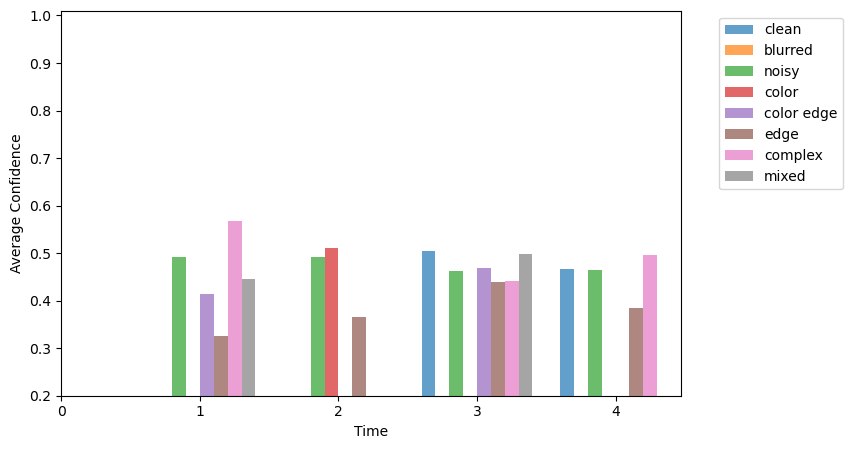

In [5]:
barwidth=0.2
mid = np.array([-0.35, -0.25, -0.15, -0.05, 0.05, 0.15, 0.25, 0.35])
for m_lst in store_models:
    print(m_lst)
    store_conf = []
    fig, ax = plt.subplots(figsize=(8, 5))
    for i, m in enumerate(m_lst):
        models = ["_".join([m, str(i)]) for i in range(0, count+1)]
        conf_dist = []
        for model in models:
            # Test type
            test_type = mdl2dist(model)
            
            # Set data directory
            data_dir = "/".join([proj_dir, "images", "A", model])
        
            # Import csv
            tmp_agent = pd.read_csv("/".join([data_dir, "_".join([model, test_type,"agent_error.csv"])]))
            tmp_pred = pd.read_csv("/".join([data_dir, "_".join([model, test_type, "pred.csv"])]))

            # Alternative hallucination rate and specificity
            df_halluc = tmp_agent.iloc[0:9, :]
            if any(df_halluc["Count"] > 0):
                spec_rate.append(df_halluc["Count"].max()/sum(df_halluc["Count"].values))
                tmp_spec_halluc = []
                tmp_conf_dist = []
                for j in df_halluc[df_halluc["Count"]>0]["Error"]:
                    # Spec halluc rate
                    halluc_agent = j.split(".")[1]

                    # Confidence
                    #fig, ax = plt.subplots(figsize=(8, 5))
                    tmp_halluc_conf = tmp_pred[(tmp_pred["Agent"] == "none") & (tmp_pred["PredAgent"] == halluc_agent)]["ConfAgent"].values
                    if len(tmp_acc_conf) == 0:
                        tmp_conf_dist.append(np.nan)
                    else:
                        tmp_conf_dist.append(np.mean(tmp_halluc_conf))

                conf_dist.append(np.nanmean(np.array(tmp_conf_dist)))
            else:
                conf_dist.append(np.nan)
            store_conf.append(conf_dist)

        ## Confidence
        ax.bar(np.array(mod)+mid[i], conf_dist, width=0.1, alpha=0.7)
        ax.set_xticks([i for i in range(count+1)])
        ax.set_xticklabels(mod)
        ax.set_xlabel("Time")
        ax.set_ylabel("Average Confidence")
    plt.ylim(0.2, 1.01)
    plt.legend(["clean", "blurred", "noisy", "color", "color edge", "edge", "complex", "mixed"], bbox_to_anchor=(1.05, 1.0), loc='upper left')
    plt.show()

['A1_CL00050_00', 'A1_BL02600_00', 'A1_NO00200_00', 'A1_CO70000_00', 'A1_CE62000_00', 'A1_ED12000_00', 'A1_CX02700_00', 'A1_MI14000_00']


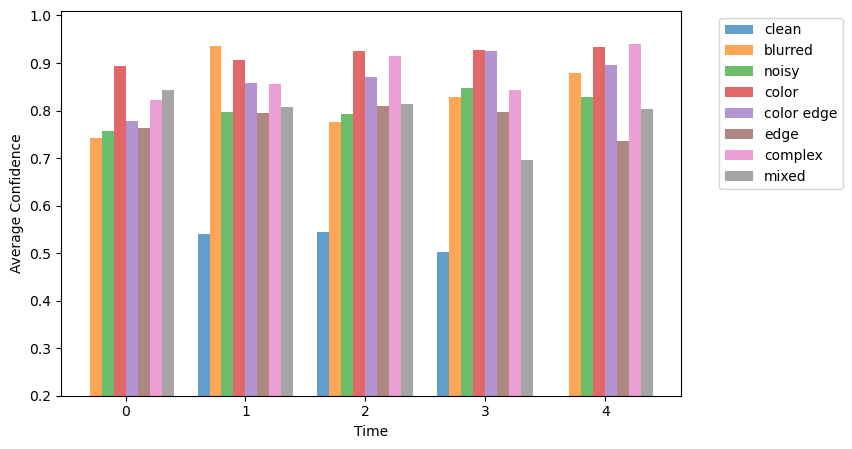

['A1_CL00050_00', 'A1_BL01500_00', 'A1_NO00110_00', 'A1_CO18000_00', 'A1_CE04000_00', 'A1_ED04000_00', 'A1_CX01800_00', 'A1_MI04000_00']


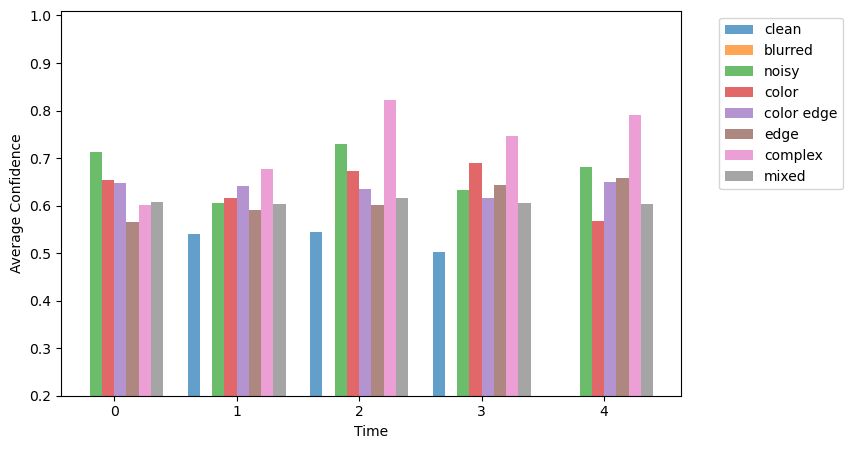

['A1_CL00050_00', 'A1_BL00200_00', 'A1_NO00060_00', 'A1_CO04000_00', 'A1_CE01500_00', 'A1_ED01500_00', 'A1_CX01400_00', 'A1_MI01500_00']


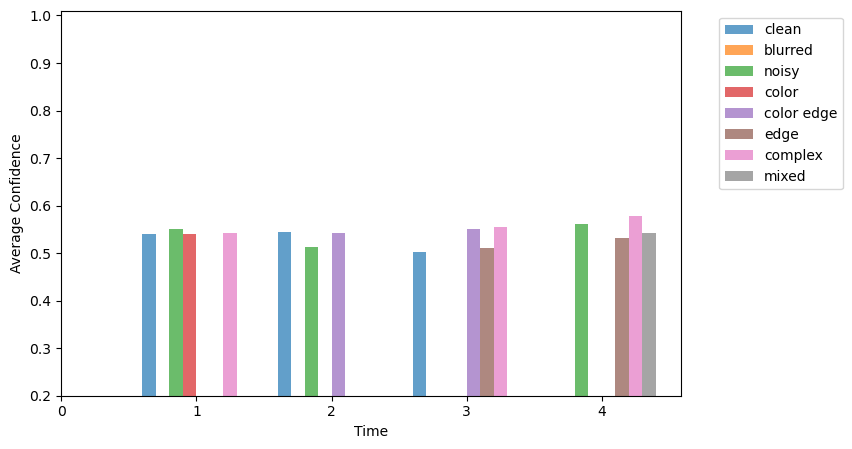

['A0_CL00050_00', 'A0_BL02600_00', 'A0_NO00200_00', 'A0_CO70000_00', 'A0_CE62000_00', 'A0_ED12000_00', 'A0_CX02700_00', 'A0_MI14000_00']


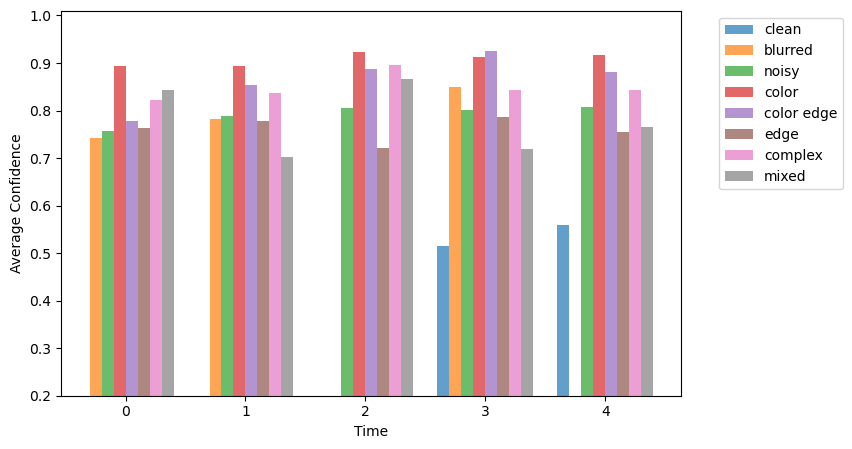

['A0_CL00050_00', 'A0_BL01500_00', 'A0_NO00110_00', 'A0_CO18000_00', 'A0_CE04000_00', 'A0_ED04000_00', 'A0_CX01800_00', 'A0_MI04000_00']


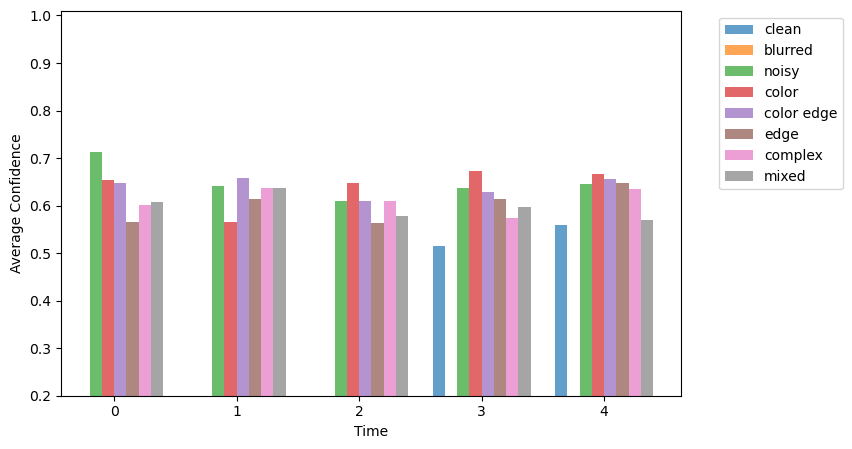

['A0_CL00050_00', 'A0_BL00200_00', 'A0_NO00060_00', 'A0_CO04000_00', 'A0_CE01500_00', 'A0_ED01500_00', 'A0_CX01400_00', 'A0_MI01500_00']


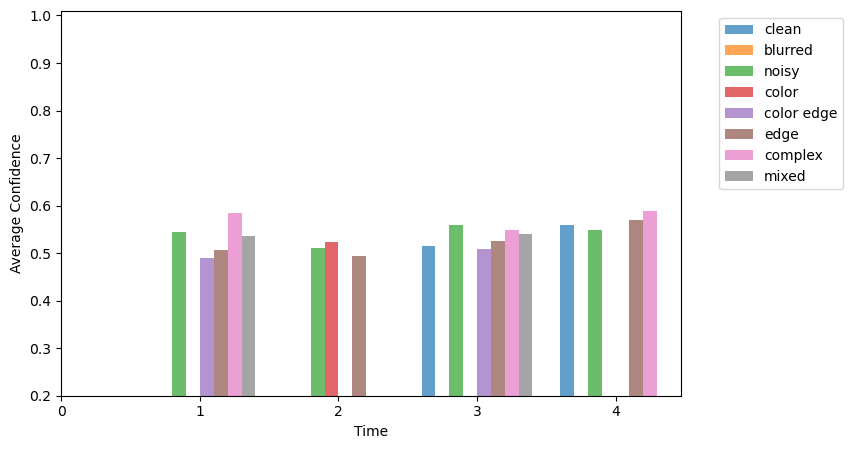

In [6]:
barwidth=0.2
mid = np.array([-0.35, -0.25, -0.15, -0.05, 0.05, 0.15, 0.25, 0.35])
for m_lst in store_models:
    print(m_lst)
    store_conf = []
    fig, ax = plt.subplots(figsize=(8, 5))
    for i, m in enumerate(m_lst):
        models = ["_".join([m, str(i)]) for i in range(0, count+1)]
        conf_dist = []
        for model in models:
            # Test type
            if "CL" in model:
                test_type="clean"
            elif "BL" in model:
                test_type="blurred"
            elif "NO" in model:
                test_type="noisy"
            elif "CO" in model:
                test_type="color"
            elif "CE" in model:
                test_type="cedge"
            elif "ED" in model:
                test_type="edge"
            elif "CX" in model:
                test_type="complex"
            elif "MI" in model:
                test_type="mixed"
            else:
                print("missing test type")
            
            # Set data directory
            data_dir = "/".join([proj_dir, "images", model])
        
            # Import csv
            tmp_agent = pd.read_csv("/".join([data_dir, "_".join([model, test_type,"agent_error.csv"])]))
            tmp_pred = pd.read_csv("/".join([data_dir, "_".join([model, test_type, "pred.csv"])]))

            # Alternative hallucination rate and specificity
            df_halluc = tmp_agent.iloc[0:9, :]
            if any(df_halluc["Count"] > 0):
                spec_rate.append(df_halluc["Count"].max()/sum(df_halluc["Count"].values))
                tmp_spec_halluc = []
                tmp_conf_dist = []
                for j in df_halluc[df_halluc["Count"]>0]["Error"]:
                    # Spec halluc rate
                    halluc_agent = j.split(".")[1]

                    # Confidence
                    #fig, ax = plt.subplots(figsize=(8, 5))
                    tmp_halluc_conf = tmp_pred[(tmp_pred["Agent"] == halluc_agent) & (tmp_pred["PredAgent"] == halluc_agent)]["ConfAgent"].values
                    if len(tmp_acc_conf) == 0:
                        tmp_conf_dist.append(np.nan)
                    else:
                        tmp_conf_dist.append(np.mean(tmp_halluc_conf))

                conf_dist.append(np.nanmean(np.array(tmp_conf_dist)))
            else:
                conf_dist.append(np.nan)
            store_conf.append(conf_dist)

        ## Confidence
        ax.bar(np.array(mod)+mid[i], conf_dist, width=0.1, alpha=0.7)
        ax.set_xticks([i for i in range(count+1)])
        ax.set_xticklabels(mod)
        ax.set_xlabel("Time")
        ax.set_ylabel("Average Confidence")
    plt.ylim(0.2, 1.01)
    plt.legend(["clean", "blurred", "noisy", "color", "color edge", "edge", "complex", "mixed"], bbox_to_anchor=(1.05, 1.0), loc='upper left')
    plt.show()

['A1_CL00050_00', 'A1_BL02600_00', 'A1_NO00200_00', 'A1_CO70000_00', 'A1_CE62000_00', 'A1_ED12000_00', 'A1_CX02700_00', 'A1_MI14000_00']


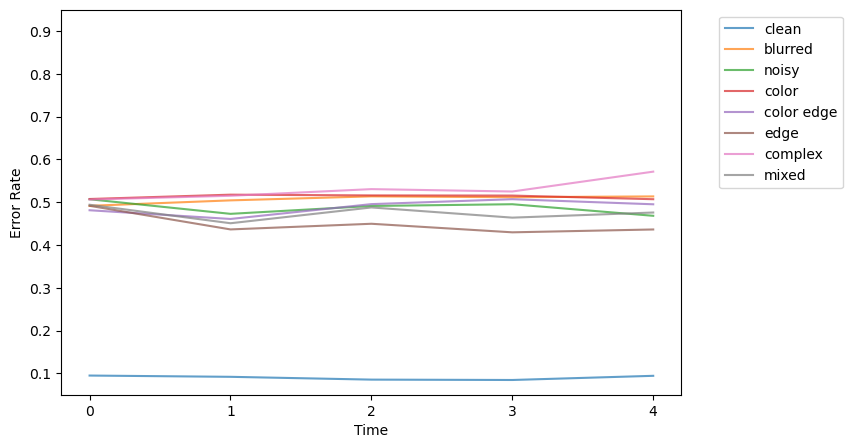

['A1_CL00050_00', 'A1_BL00200_00', 'A1_NO00060_00', 'A1_CO04000_00', 'A1_CE01500_00', 'A1_ED01500_00', 'A1_CX01400_00', 'A1_MI01500_00']


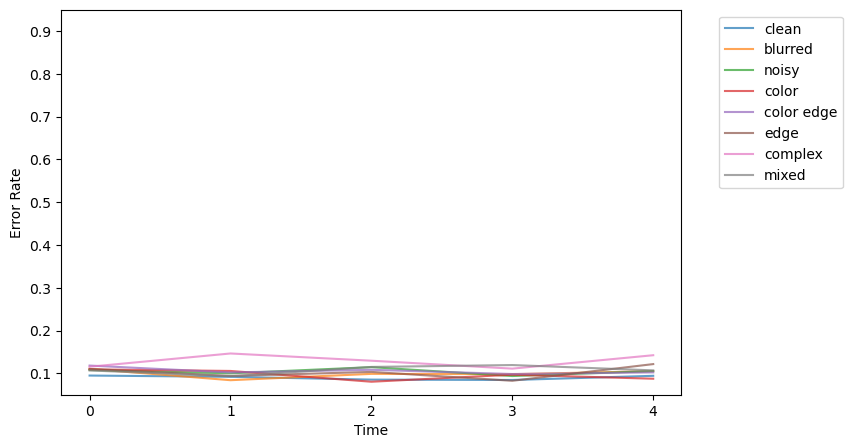

['A0_CL00050_00', 'A0_BL02600_00', 'A0_NO00200_00', 'A0_CO70000_00', 'A0_CE62000_00', 'A0_ED12000_00', 'A0_CX02700_00', 'A0_MI14000_00']


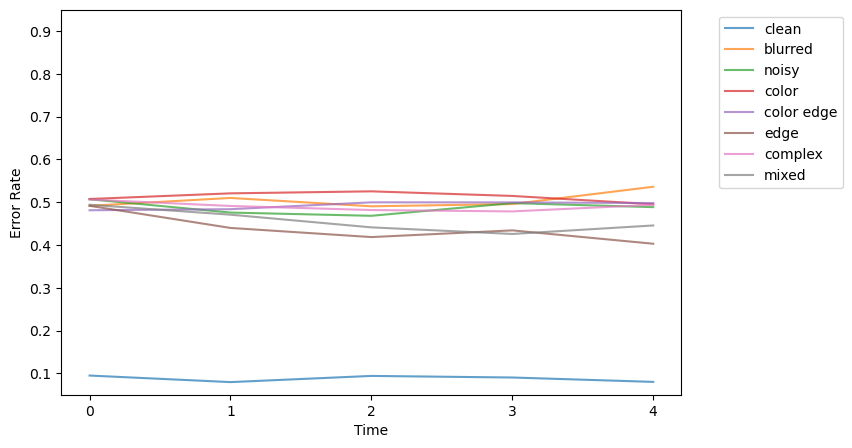

['A0_CL00050_00', 'A0_BL01500_00', 'A0_NO00110_00', 'A0_CO18000_00', 'A0_CE04000_00', 'A0_ED04000_00', 'A0_CX01800_00', 'A0_MI04000_00']


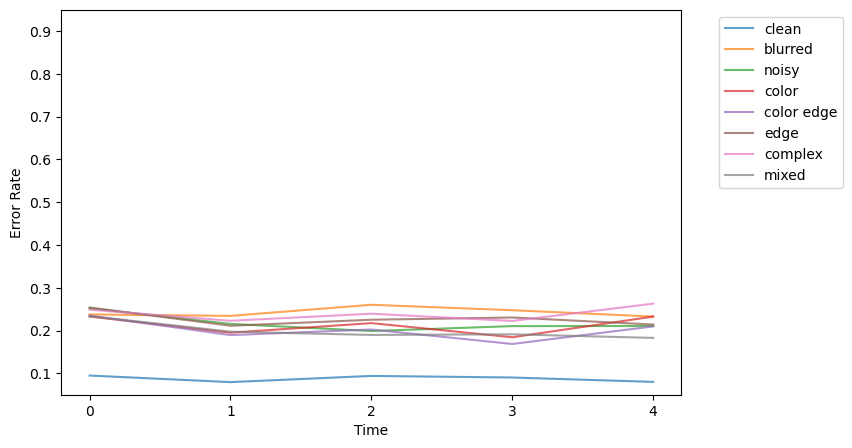

['A0_CL00050_00', 'A0_BL00200_00', 'A0_NO00060_00', 'A0_CO04000_00', 'A0_CE01500_00', 'A0_ED01500_00', 'A0_CX01400_00', 'A0_MI01500_00']


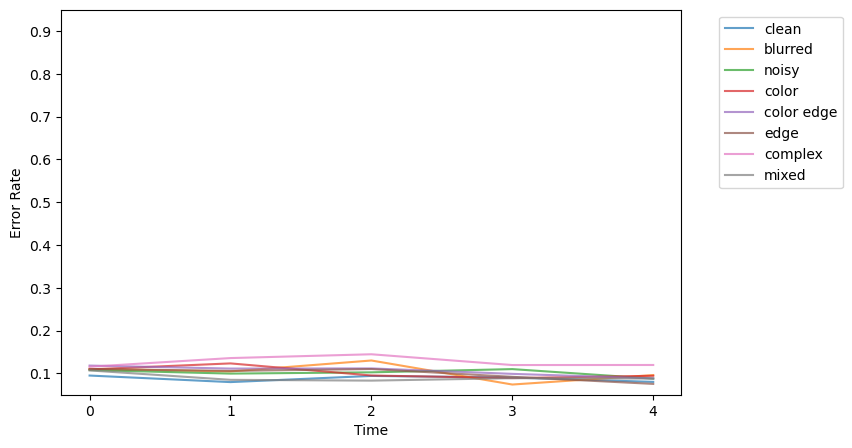

In [11]:
from analysis.utils import mdl2dist, calc_error_rate

for m_lst in store_models:
    print(m_lst)
    fig, ax = plt.subplots(figsize=(8, 5))
    for m in m_lst:
        models = ["_".join([m, str(i)]) for i in range(0, count+1)]

        df_scene = pd.DataFrame()
        df_agent = pd.DataFrame()
        error_rate = []
        for i, model in enumerate(models):
            # Get test type
            test_type = mdl2dist(model)
            
            # Calculate error rate
            error_rate.append(calc_error_rate(model, test_type, proj_dir))

        ## Error Rate
        ax.plot(error_rate, alpha=0.7)
        ax.set_xticks([i for i in range(count+1)])
        ax.set_xticklabels(mod)
        ax.set_xlabel("Time")
        ax.set_ylabel("Error Rate")
    plt.ylim(0.05, 0.95)
    plt.legend(["clean", "blurred", "noisy", "color", "color edge", "edge", "complex", "mixed"], bbox_to_anchor=(1.05, 1.0), loc='upper left')
    plt.show()

In [53]:
from analysis.utils import mdl2dist, calc_error_rate
models = ["A1_CL050_00", "A1_BL020_00", "A1_NO060_00", "A1_CO040_00", "A1_ED010_00", "A1_CE010_00", "A1_CX140_00", "A1_MI010_00"]
for model in models:
    model = model + "_0"
    
    # Get test type
    test_type = mdl2dist(model)
    
    # Calculate error rate
    err_rate = calc_error_rate(model, test_type, proj_dir)
    if abs(err_rate - 0.10) > 0.04:
        print(model+": "+str(err_rate)+"**")
    else:
        print(model+": "+str(err_rate))

A1_CL050_00_0: 0.09481481481481481
A1_BL020_00_0: 0.11037037037037037
A1_NO060_00_0: 0.10765432098765432
A1_CO040_00_0: 0.10925925925925926
A1_ED010_00_0: 0.11024691358024691
A1_CE010_00_0: 0.11814814814814815
A1_CX140_00_0: 0.1154320987654321
A1_MI010_00_0: 0.10679012345679012


In [5]:
from analysis.utils import mdl2dist, calc_error_rate
models = ["A1_CL050_00", "A1_BL150_00", "A1_NO110_00", "A1_CO180_00", "A1_CE040_00", "A1_ED040_00", "A1_CX180_00", "A1_MI040_00"] # NO110
for model in models:
    model = model + "_0"
    
    # Get test type
    test_type = mdl2dist(model)
    
    # Calculate error rate
    err_rate = calc_error_rate(model, test_type, proj_dir)
    if abs(err_rate - 0.23) > 0.04:
        print(model+": "+str(err_rate)+"**")
    else:
        print(model+": "+str(err_rate))

A1_CL050_00_0: 0.09481481481481481**
A1_BL150_00_0: 0.23765432098765432
A1_NO110_00_0: 0.25209876543209875
A1_CO180_00_0: 0.23271604938271606
A1_CE040_00_0: 0.23506172839506173
A1_ED040_00_0: 0.25382716049382714
A1_CX180_00_0: 0.24876543209876542
A1_MI040_00_0: 0.2337037037037037


In [6]:

models = ["A1_CL050_00", "A1_BL260_00", "A1_NO200_00", "A1_CO700_00", "A1_CE620_00", "A1_ED120_00", "A1_CX270_00", "A1_MI140_00"] # BL260
for model in models:
    model = model
    
    # Get test type
    test_type = mdl2dist(model)
    
    # Calculate error rate
    err_rate = calc_error_rate(model+ "_0", test_type, proj_dir)
    if abs(err_rate - 0.5) > 0.04:
        print(model+": "+str(err_rate)+"**")
    else:
        print(model+": "+str(err_rate))

A1_CL050_00: 0.09481481481481481**
A1_BL260_00: 0.49160493827160495
A1_NO200_00: 0.5069135802469136
A1_CO700_00: 0.5075308641975309
A1_CE620_00: 0.4812345679012346
A1_ED120_00: 0.49160493827160495
A1_CX270_00: 0.5062962962962962
A1_MI140_00: 0.49407407407407405


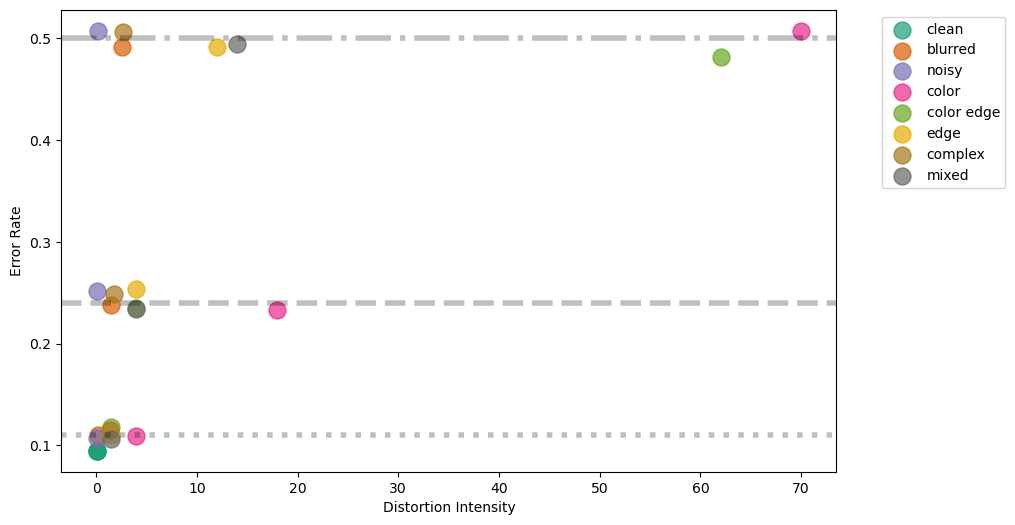

In [13]:
store_models = [["A1_CL00050_00", "A1_CL00050_00", "A1_CL00050_00"],
         ["A1_BL00200_00", "A1_BL01500_00", "A1_BL02600_00"], 
         ["A1_NO00060_00", "A1_NO00110_00", "A1_NO00200_00"], 
         ["A1_CO04000_00", "A1_CO18000_00", "A1_CO70000_00"], 
         ["A1_CE01500_00", "A1_CE04000_00", "A1_CE62000_00"], 
         ["A1_ED01500_00", "A1_ED04000_00", "A1_ED12000_00"], 
         ["A1_CX01400_00", "A1_CX01800_00", "A1_CX02700_00"], 
         ["A1_MI01500_00", "A1_MI04000_00", "A1_MI14000_00"]]
fig, ax = plt.subplots(figsize=(10, 6))
for m_lst in store_models:
    dval = []
    err_rate = []
    for model in m_lst:
        model = model
        
        # Get test type
        test_type = mdl2dist(model)
        
        # Calculate error rate
        err_rate.append(calc_error_rate(model+ "_0", test_type, "A", proj_dir))

        # Load dval
        dval.append(np.float32(open("/".join([proj_dir, "lib", model, "dval.txt"])).readlines()[0].replace("\n", "")))

    ax.scatter(dval, err_rate, alpha=0.7, s=150)
ax.axhline(0.50, color="k", linestyle = "-.", alpha=0.25, linewidth=4)
ax.axhline(0.24, color="k", linestyle = "--", alpha=0.25, linewidth=4)
ax.axhline(0.11, color="k", linestyle = ":", alpha=0.25, linewidth=4)
plt.xlabel("Distortion Intensity")
plt.ylabel("Error Rate")
plt.legend(["clean", "blurred", "noisy", "color", "color edge", "edge", "complex", "mixed"], bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.show()

In [13]:
model = "A1_CL050_00"
test_type = mdl2dist(model)
np.float32(open("/".join([proj_dir, "lib", model, "dval.txt"])).readlines()[0].replace("\n", ""))

0.05

In [14]:
test_type

'clean'

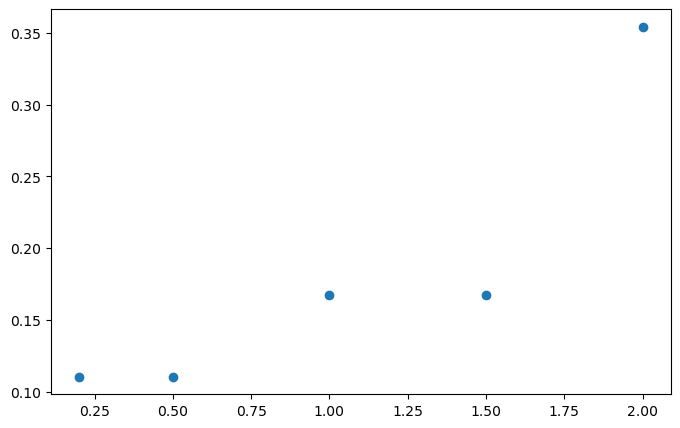

In [8]:
fig, ax = plt.subplots(figsize=(8, 5))
ax.scatter([0.2, 0.5, 1.0, 1.5, 2.0], [0.11037037037037037, 0.11037037037037037, 0.16703703703703704, 0.16703703703703704, 0.35432098765432096])
plt.show()